<a class="anchor" id="top"></a>  <!-- Anchor for back to top -->

<div class="alert alert-block" style="
    background-color: #064E3B; 
    color: #A7F3D0; 
    padding: 20px; 
    border-radius: 5px; 
    margin-top: 20px;
    font-size: 14px;
">
<br> 
<p style="text-align:center">
    <img src="app/header.png" width="1000" style="border-radius: 10px;" 
         alt="AI-generated image of a sleek black car emitting CO₂ fumes on a futuristic highway with data visualization elements in the background">
</p>

<h1 style="text-align:center; color: #D1FAE5;">Predicting CO₂ Emission Rates of Internal Combustion Engine Vehicles (ICEVs)</h1>

<p style="text-align:center;">
    Hasan Roshan  
    <br>  
    <a href="https://www.linkedin.com/in/hasanroshan/" target="_blank" style="color: #A7F3D0;">LinkedIn</a> |  
    <a href="https://github.com/hroshan/sample_works" target="_blank" style="color: #A7F3D0;">GitHub</a>
</p>

**Objectives:**

This analysis aims to **develop a predictive model** for estimating **use-phase CO₂ emission rates (aka, intensities/factors)** from Internal Combustion Engine Vehicles (ICEVs). The approach involves:

- Importing and preprocessing data to ensure it is ready for analysis  
- Conducting **exploratory data analysis (EDA)** to uncover relationships between key features  
- Training and evaluating multiple **machine learning models** using scikit-learn  
- Selecting the best-performing model and preparing it for **deployment in an application**

<div class="alert alert-block" style="
    background-color: #064E3B; 
    color: #A7F3D0; 
    padding: 15px; 
    border-radius: 5px; 
    margin-top: 20px;
    font-size: 14px;
">
    <h2 style="margin-top: 0; color: #D1FAE5;"> Table of Contents</h2>
    <ol>
        <li><a href="#introduction" style="color: #A7F3D0;">Introduction</a></li>
        <li><a href="#data" style="color: #A7F3D0;">Data Understanding</a></li>
        <li><a href="#data_w" style="color: #A7F3D0;">Data Wrangling</a></li>
        <li><a href="#eda" style="color: #A7F3D0;">Explanatory Data Analysis (EDA)</a></li>
        <li><a href="#mlm" style="color: #A7F3D0;">Machine Learning Modeling</a></li>
        <li><a href="#conclusion" style="color: #A7F3D0;">Conclusion</a></li>
    </ol>
</div>

<h2 style="
    background-color: #064E3B; 
    color: #A7F3D0; 
    padding: 15px; 
    border-radius: 5px;
    font-size: 28px;
    margin-top: 20px;
">
    1. Introduction
    <a class="anchor" id="introduction" style="margin: 10;"></a>
</h2>

Internal Combustion Engine Vehicles (ICEVs) are a significant source of greenhouse gas (GHG) emissions, contributing substantially to climate change. Accurately predicting CO₂ emission rates from ICEVs is crucial for manufacturers, consumers, researchers, and policymakers aiming to mitigate environmental impacts.

This project focuses on use-phase CO₂ emission rates of ICEVs, utilizing publicly available data from the <a href="https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64" target="_blank">Natural Resources of Canada</a>. The dataset spans records from 1995 to 2025, providing a comprehensive basis for emissions modeling and enabling us to explore trends over three decades. This is particularly relevant for understanding the impact of regulatory changes and technological advancements.

**Key Features of the Dataset:**
- **Time Span:** 1995 - 2025
- **Variables:** 17 numerical and categorical variables, including make, model, engine size, fuel type, and fuel efficiency metircs

**Workflow Overview:**
- **Data Preparation:** 
  - Import, clean, and preprocess multiple datasets
  - Ensure data consistency by handling missing values, filtering hybrid vehicles, and addressing outliers
- **Exploratory Data Analysis (EDA):** 
  - Identify key relationships between variables such as engine size, fuel type, and fuel efficiency (MPG)
  - Determine modeling implications of EDA
- **Machine Learning Model Development:** 
  - Train multiple models, including Linear Ridge Regression, Polynomial Ridge Regression, and Random Forest
  - Compare model performance using cross-validation and key metrics (R², RMSE, MAE)
- **Model Deployment:**
  - Export the best-performing model and integrate it into an interactive web application using Streamlit, allowing users to predict CO₂ emission rates for different vehicle specifications.

This project not only demonstrates the effectiveness of ML-based approaches in environmental impact assessments but also provides a tool for informed decision-making in policy and consumer choices.

<h2 style="
    background-color: #064E3B; 
    color: #A7F3D0; 
    padding: 15px; 
    border-radius: 5px;
    font-size: 28px;
    margin-top: 20px;
">
    2. Data Understanding
    <a class="anchor" id="data" style="margin: 10;"></a>
</h2>

<h3>2.1. Importing Needed Libraries</h3> 

In this section, I will:
- Import necessary libraries for data manipulation, visualization, and statistical analysis.
- Import and combine the data.
- Check data structure and summary statistics to gain an intial understanding of the data.

In [23]:
# Data Manipulation and Analysis
import pandas as pd    # For data manipulation and analysis
import numpy as np     # For numerical operations and array handling
import glob            # For file handling (importing multiple datasets)

# Version Checks for Reproducibility
print(f"Pandas Version: {pd.__version__}")
print(f"Numpy Version: {np.__version__}")

print("Library import complete!")

Pandas Version: 2.1.4
Numpy Version: 1.26.4
Library import complete!


<h3>2.2. Importing Data</h3> 

Now that I have the required libraries, my first step is to import and take a look at the data.

There are 9 data for different timeframes. They contain model-specific fuel consumption ratings and estimated carbon dioxide emissions for retail sale in Canada from 1995 to 2025. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

Since the data is being updated regularly, I use a static copy for reproducibility of this project. The files was downloaded on January 20, 2025, and can be found in my github project repository [here](https://github.com/hroshan/CO2_Emissions_Prediction/tree/main/raw_data).

Let’s first import and then combine them to have one file. Upon reviewing the source data and a manual inspection, I found out the files are compatible and ready to merge. 

In [40]:
# List of file paths
file_paths = [
    "/Users/hasan/CO2/data/my1995-2004-fuel-consumption-ratings-5-cycle.csv",
    "/Users/hasan/CO2/data/my2005-2014-fuel-consumption-ratings-5-cycle.csv",
    "/Users/hasan/CO2/data/my2015-2019-fuel-consumption-ratings.csv",
    "/Users/hasan/CO2/data/my2020-fuel-consumption-ratings.csv",
    "/Users/hasan/CO2/data/my2021-fuel-consumption-ratings.csv",
    "/Users/hasan/CO2/data/my2022-fuel-consumption-ratings.csv",
    "/Users/hasan/CO2/data/my2023-fuel-consumption-ratings.csv",
    "/Users/hasan/CO2/data/my2024-fuel-consumption-ratings.csv",
    "/Users/hasan/CO2/data/my2025-fuel-consumption-ratings.csv"
]

# Read and concatenate files with encoding handling
df_list = []
for file in file_paths:
    try:
        temp_df = pd.read_csv(file, encoding="utf-8")  # Try UTF-8 first
    except UnicodeDecodeError:
        temp_df = pd.read_csv(file, encoding="ISO-8859-1")  # Fallback encoding
    df_list.append(temp_df)

# Combine all DataFrames
df = pd.concat(df_list, ignore_index=True)

# Save the combined dataset
df.to_csv("combined_fuel_consumption.csv", index=False)

print("File saved Successfully!")

File saved Successfully!


<h3>2.3. Checking Data</h3> 

Let’s view the first five rows of the dataset.

In [43]:
# Preview the first few rows
df.head()

Model year   Make         Model Vehicle class  Engine size (L)  Cylinders  \
0        1995  Acura       Integra    Subcompact              1.8          4   
1        1995  Acura       Integra    Subcompact              1.8          4   
2        1995  Acura  Integra GS-R    Subcompact              1.8          4   
3        1995  Acura        Legend       Compact              3.2          6   
4        1995  Acura  Legend Coupe       Compact              3.2          6   

  Transmission Fuel type  City (L/100 km)  Highway (L/100 km)  \
0           A4         X             11.6                 8.3   
1           M5         X             11.0                 8.3   
2           M5         Z             10.8                 8.3   
3           A4         Z             14.2                10.5   
4           A4         Z             14.6                11.0   

   Combined (L/100 km)  Combined (mpg)  CO2 emissions (g/km)  CO2 rating  \
0                 10.1              28                   232         NaN   
1                  9.8              29                   225         NaN   
2                  9.7              29                   223         NaN   
3                 12.5              23                   288         NaN   
4                 13.0              22                   299         NaN   

   Smog rating  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

For more information on each feature, please check [this link](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64/resource/ec44c747-a640-4481-bcf0-a2ea7ca8f249) from the data source.

Let's check data types and make sure they are correctly assigned.

In [46]:
df.dtypes

Model year                int64
Make                     object
Model                    object
Vehicle class            object
Engine size (L)         float64
Cylinders                 int64
Transmission             object
Fuel type                object
City (L/100 km)         float64
Highway (L/100 km)      float64
Combined (L/100 km)     float64
Combined (mpg)            int64
CO2 emissions (g/km)      int64
CO2 rating              float64
Smog rating             float64
dtype: object

All data types are correct. Now, let's investigate missing values.

Let's take a look at the summary of the data.

In [49]:
df.describe(include="all")  # Summary of numerical and categorical data

Model year       Make    Model Vehicle class  Engine size (L)  \
count   28384.000000      28384    28384         28384     28384.000000   
unique           NaN         55     4393            17              NaN   
top              NaN  Chevrolet  Mustang       Compact              NaN   
freq             NaN       2657      139          3886              NaN   
mean     2010.705609        NaN      NaN           NaN         3.332867   
std         8.341663        NaN      NaN           NaN         1.340189   
min      1995.000000        NaN      NaN           NaN         0.800000   
25%      2004.000000        NaN      NaN           NaN         2.200000   
50%      2011.000000        NaN      NaN           NaN         3.000000   
75%      2018.000000        NaN      NaN           NaN         4.200000   
max      2025.000000        NaN      NaN           NaN         8.400000   

           Cylinders Transmission Fuel type  City (L/100 km)  \
count   28384.000000        28384     28384     28384.000000   
unique           NaN           30         5              NaN   
top              NaN           A4         X              NaN   
freq             NaN         5489     15468              NaN   
mean        5.819828          NaN       NaN        13.765075   
std         1.808745          NaN       NaN         3.746177   
min         2.000000          NaN       NaN         4.000000   
25%         4.000000          NaN       NaN        11.200000   
50%         6.000000          NaN       NaN        13.350000   
75%         8.000000          NaN       NaN        15.800000   
max        16.000000          NaN       NaN        33.300000   

        Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
count         28384.000000         28384.000000    28384.000000   
unique                 NaN                  NaN             NaN   
top                    NaN                  NaN             NaN   
freq                   NaN                  NaN             NaN   
mean              9.977822            12.060960       25.068842   
std               2.580177             3.182836        6.825489   
min               3.900000             4.000000       10.000000   
25%               8.200000             9.900000       20.000000   
50%               9.500000            11.600000       24.000000   
75%              11.300000            13.800000       29.000000   
max              22.100000            27.500000       71.000000   

        CO2 emissions (g/km)   CO2 rating  Smog rating  
count           28384.000000  9403.000000  8297.000000  
unique                   NaN          NaN          NaN  
top                      NaN          NaN          NaN  
freq                     NaN          NaN          NaN  
mean              274.582335     4.628948     4.839340  
std                66.020731     1.568625     1.755582  
min                94.000000     1.000000     1.000000  
25%               228.000000     4.000000     3.000000  
50%               267.000000     5.000000     5.000000  
75%               313.000000     5.000000     6.000000  
max               633.000000    10.000000     8.000000

The `.describe(include="all")` function enables us to quickly review the dataset by providing summary statistics for all columns, including both quantitative and qualitative variables. 

From this overview, we gain the following insights:
- **Total Records:** The dataset contains 28,384 data records.
- **Quantitative Variables:** We can observe the range, variance, and distribution of numerical features, helping us identify potential outliers or unusual values.
- **Qualitative Variables:** We learn the number of unique records, the most frequent value (mode), and its frequency, which can reveal dominant categories or imbalances.
  
These insights are crucial before moving to the Data Wrangling step, as they inform our cleaning and preprocessing decisions.

Now, it's time to move on data preparation.

<h2 style="
    background-color: #064E3B; 
    color: #A7F3D0; 
    padding: 15px; 
    border-radius: 5px;
    font-size: 28px;
    margin-top: 20px;
">
    3. Data Wrangling
    <a class="anchor" id="data_w" style="margin: 10;"></a>
</h2>

The Data Wrangling process ensures the dataset is clean, consistent, and ready for analysis and modeling. 
In this section, I will:
- Inspect the dataset structure and data types.
- Check for missing values and handle them thoughtfully.
- Engineer new features for better model performance.

In [54]:
# Visualization
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns            # For enhanced statistical visualizations

# Environment Setup to display plots inline in Jupyter Notebooks
%matplotlib inline

print("Library import and environment setup complete!")

Library import and environment setup complete!


<h3>3.1. Handling Missing Data</h3> 

Missing data is a common challenge in real-world datasets, and it is crucial to handle it thoughtfully to maintain the integrity of the analysis.

In [57]:
df.isnull().sum()

Model year                  0
Make                        0
Model                       0
Vehicle class               0
Engine size (L)             0
Cylinders                   0
Transmission                0
Fuel type                   0
City (L/100 km)             0
Highway (L/100 km)          0
Combined (L/100 km)         0
Combined (mpg)              0
CO2 emissions (g/km)        0
CO2 rating              18981
Smog rating             20087
dtype: int64

**Observations:**
- There are significant missing values in the `CO2 rating` and `smog rating` columns, mainly due to unavailability for the years 1995-2004.
- We have a decision to make on how to handle these missing values.

**Decision: Drop the Columns**
- These columns are not critical for the predictive model.
- Removing them would lead to significant data loss (~20,000 records which stands for ~70% of the data).
- There isn't enough data to implement a reliable alternative strategy.

**Alternative Approaches Considered:**
- Imputation using mean, median, or mode values.
- Predictive imputation using correlated features.
Both were ruled out due to the risk of introducing bias or noise.

By dropping these columns, I preserve the overall dataset size and focus on available variables relevant to theobjective.

In [60]:
# Drop the last two columns
cdf = df.copy() # make an independent copy for the cleaned data
cdf = cdf.drop(columns=["CO2 rating", "Smog rating"])

cdf.head()

Model year   Make         Model Vehicle class  Engine size (L)  Cylinders  \
0        1995  Acura       Integra    Subcompact              1.8          4   
1        1995  Acura       Integra    Subcompact              1.8          4   
2        1995  Acura  Integra GS-R    Subcompact              1.8          4   
3        1995  Acura        Legend       Compact              3.2          6   
4        1995  Acura  Legend Coupe       Compact              3.2          6   

  Transmission Fuel type  City (L/100 km)  Highway (L/100 km)  \
0           A4         X             11.6                 8.3   
1           M5         X             11.0                 8.3   
2           M5         Z             10.8                 8.3   
3           A4         Z             14.2                10.5   
4           A4         Z             14.6                11.0   

   Combined (L/100 km)  Combined (mpg)  CO2 emissions (g/km)  
0                 10.1              28                   232  
1                  9.8              29                   225  
2                  9.7              29                   223  
3                 12.5              23                   288  
4                 13.0              22                   299

<h3>3.2. Feature Engineering</h3> 

Let's first drop `Combined (mpg)` since it perfectly correlates with `combined (L/100 km)`. Notice the `Combine (mpg)` is in Imperial gallon. Also, the `Combined (mpg)` has gone through some rounding that introduces error. For instance, check the second and third records above that have different `Combined (L/100 km)` but same `Combined (mpg)` values!

In [63]:
# Drop 'Combined (mpg)' column
cdf = cdf.drop(columns=["Combined (mpg)"])
cdf.head()

Model year   Make         Model Vehicle class  Engine size (L)  Cylinders  \
0        1995  Acura       Integra    Subcompact              1.8          4   
1        1995  Acura       Integra    Subcompact              1.8          4   
2        1995  Acura  Integra GS-R    Subcompact              1.8          4   
3        1995  Acura        Legend       Compact              3.2          6   
4        1995  Acura  Legend Coupe       Compact              3.2          6   

  Transmission Fuel type  City (L/100 km)  Highway (L/100 km)  \
0           A4         X             11.6                 8.3   
1           M5         X             11.0                 8.3   
2           M5         Z             10.8                 8.3   
3           A4         Z             14.2                10.5   
4           A4         Z             14.6                11.0   

   Combined (L/100 km)  CO2 emissions (g/km)  
0                 10.1                   232  
1                  9.8                   225  
2                  9.7                   223  
3                 12.5                   288  
4                 13.0                   299

<h4>3.2.1 Convering Consumption Features from (L/100 km) to (mpg) </h4>

While not necessary, I want to transform consumptions to MPG (U.S. gallon). The formula for conversion is:
$$\text{MPG(U.S.)} = \frac{235.215}{L/100 \text{ km}}$$
where 235.215 is the conversion factor between liters per 100 km and miles per gallon.

In [66]:
# Convert City, Highway, and Combined fuel consumption to mpg (U.S. gallon)
cdf["City (mpg)"] = (235.215 / cdf["City (L/100 km)"]).round(2)
cdf["Highway (mpg)"] = (235.215 / cdf["Highway (L/100 km)"]).round(2)
cdf["Combined (mpg)"] = (235.215 / cdf["Combined (L/100 km)"]).round(2)

# Drop original City and Highway L/100 km columns
cdf = cdf.drop(columns=["City (L/100 km)", "Highway (L/100 km)", "Combined (L/100 km)"])

# Reorder the Columns to match the original dataset
cdf = cdf[['Model year', 
           'Make', 'Model', 
           'Vehicle class', 
           'Engine size (L)', 
           'Cylinders', 
           'Transmission', 
           'Fuel type', 
           'City (mpg)', 
           'Highway (mpg)', 
           'Combined (mpg)', 
           'CO2 emissions (g/km)']]
cdf.head()

Model year   Make         Model Vehicle class  Engine size (L)  Cylinders  \
0        1995  Acura       Integra    Subcompact              1.8          4   
1        1995  Acura       Integra    Subcompact              1.8          4   
2        1995  Acura  Integra GS-R    Subcompact              1.8          4   
3        1995  Acura        Legend       Compact              3.2          6   
4        1995  Acura  Legend Coupe       Compact              3.2          6   

  Transmission Fuel type  City (mpg)  Highway (mpg)  Combined (mpg)  \
0           A4         X       20.28          28.34           23.29   
1           M5         X       21.38          28.34           24.00   
2           M5         Z       21.78          28.34           24.25   
3           A4         Z       16.56          22.40           18.82   
4           A4         Z       16.11          21.38           18.09   

   CO2 emissions (g/km)  
0                   232  
1                   225  
2                   223  
3                   288  
4                   299

Notice that I could used the initial `Combined (mpg)` and convert it to the U.S. gallon. In that case, I would have to transform it as well to make sure all consumption values are consistent using the following formula:
$$\text{MPG (U.S.)} = \text{MPG (Imperial)} \times 0.8327$$

For simplicity and more accuracy, I dropped the **imperial** `Combined (mpg)` column first and used the `Combined (L/100 km)` for conversion. 

<h4>3.2.2. Transforming Emission rates from (g/km) to (g/mi)</h4>

Now, I also need to convert CO2 emission rates from "g/km" to "g/mi" to reflect the changes. The formula is:
$$\text{CO}_2 \text{ (g/mi)} = \frac{\text{CO}_2 \text{ (g/km)}}{0.621371}$$

In [70]:
# Convert CO2 emission rates from g/km to g/mile
cdf["CO2 emissions (g/mi)"] = (cdf["CO2 emissions (g/km)"] / 0.621371).round(2)

# Drop original CO2 emission rates (g/km)
cdf = cdf.drop(columns=["CO2 emissions (g/km)"])

cdf.head()

Model year   Make         Model Vehicle class  Engine size (L)  Cylinders  \
0        1995  Acura       Integra    Subcompact              1.8          4   
1        1995  Acura       Integra    Subcompact              1.8          4   
2        1995  Acura  Integra GS-R    Subcompact              1.8          4   
3        1995  Acura        Legend       Compact              3.2          6   
4        1995  Acura  Legend Coupe       Compact              3.2          6   

  Transmission Fuel type  City (mpg)  Highway (mpg)  Combined (mpg)  \
0           A4         X       20.28          28.34           23.29   
1           M5         X       21.38          28.34           24.00   
2           M5         Z       21.78          28.34           24.25   
3           A4         Z       16.56          22.40           18.82   
4           A4         Z       16.11          21.38           18.09   

   CO2 emissions (g/mi)  
0                373.37  
1                362.10  
2                358.88  
3                463.49  
4                481.19

<h4>3.2.3. Transofrming Transmission into two features</h4>

Now, let's check the variable `Transmission`. The [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64) says it indicates the type of transmission and the number of gears/speeds. There are five unique transmission types:
- A = Automatic
- AM = Automated manual
- AS = Automatic with select shift
- AV = Continuously variable
- M = Manual

For instance, the value for the first row is `A4`, which means the car has an automatic transmission with four gears/speeds. 

I will break it into two: `Transmission Type` and `Number of gears-speed`. This will help to utilize the information packed here better.

**Why Transform This Variable?**
- Splitting it enhances interpretability.
- These features are known to impact fuel efficiency and emissions, thus potentially improving model performance.

**Approach:**
- Extract the first part of the code as `Transmission type`.
- Extract the numerical part as `Number of gears-speeds`.
- Handle missing values using the median to minimize bias.

In [73]:
# Extract the first part of the transmission code to map it
cdf["Transmission type"] = cdf["Transmission"].str.extract(r'(^[A-Z]+)')[0]

# Checking the result
print("\nTransmission Type Value Counts After Grouping:")
print(cdf["Transmission type"].value_counts())


Transmission Type Value Counts After Grouping:
Transmission type
A     11595
AS     7781
M      6201
AV     1478
AM     1329
Name: count, dtype: int64


In [75]:
# Extract the numerical part of the Transmission column and create a new column "number of gears-speeds"
cdf["Number of gears-speeds"] = cdf["Transmission"].str.extract(r'(\d+)').astype(float)

print("\nNumber of Gears/speeds Value Counts After Grouping:")
print(cdf["Number of gears-speeds"].value_counts())


Number of Gears/speeds Value Counts After Grouping:
Number of gears-speeds
6.0     8144
4.0     5750
5.0     5707
8.0     3774
7.0     2039
10.0     927
9.0      885
3.0      187
1.0       28
Name: count, dtype: int64


Now, let's check if any missing value is introduced into the dataframe due to these tranformations.

In [78]:
cdf.isnull().sum()

Model year                  0
Make                        0
Model                       0
Vehicle class               0
Engine size (L)             0
Cylinders                   0
Transmission                0
Fuel type                   0
City (mpg)                  0
Highway (mpg)               0
Combined (mpg)              0
CO2 emissions (g/mi)        0
Transmission type           0
Number of gears-speeds    943
dtype: int64

<h5> Dealing with Missing Gears/Speeds values</h5>

There are 943 missing values for the `Number of gears-speeds` variable. I replace NAs with the mode for the following reasons:

- **Not Mean:** `Number of gears-speeds` is a discrete variable. It represents countable, distinct values (e.g., 4-speed, 6-speed, etc.) that correspond to specific engineering designs.
- **Not Median:** While using the median sounds good because it is robust to outliers, it works best when the data is symmetrically distributed. The value counts above illustrate the distribution is not symmetrical.
- **Mode is ideal** when the variable has a skewed or multimodal distribution, as is common with gears. 
    - Using the mode maintains the integrity of real-world engineering design choices.
    - `Transmission type` and `Vehicle class` are the most relevant features that exhibit significant variance in `Number of gears-speeds`. So, I use mode values specific to this groupings.

**Approach:**
1. **Identify Affected Records:** Filter records where `Number of gears-speeds` is missing.
2. **Calculate Mode by Category:** Compute the mode for each **(Vehicle Class & Transmission Type)** combination.
3. **Handle Cases Without a Category-Specific Mode:**  
   - If no mode exists for a given `(Vehicle Class, Transmission Type)`, use the **overall mode** of `Number of gears-speeds` instead.
4. **Replace Missing Values:** Impute missing values with the appropriate mode (either category-specific or overall).

In [81]:
# Filter records where "Number of gears-speeds" is null
gears_mask = cdf[cdf["Number of gears-speeds"].isna()].copy()

# Print the number of records with NaN values
print("Number of records with NaN in 'Number of gears-speeds':", gears_mask.shape[0])

# Display the first few rows
gears_mask.head()

Number of records with NaN in 'Number of gears-speeds': 943


Model year    Make    Model          Vehicle class  Engine size (L)  \
4756        2001  Toyota    Prius                Compact              1.5   
4845        2002    Audi       A4                Compact              1.8   
4851        2002    Audi       A6               Mid-size              3.0   
5454        2002  Saturn      Vue  Sport utility vehicle              2.2   
5456        2002  Saturn  Vue AWD  Sport utility vehicle              2.2   

      Cylinders Transmission Fuel type  City (mpg)  Highway (mpg)  \
4756          4           AV         X       42.77          41.27   
4845          4           AV         Z       18.23          26.43   
4851          6           AV         Z       16.56          23.29   
5454          4           AV         X       18.82          25.85   
5456          4           AV         X       18.38          24.00   

      Combined (mpg)  CO2 emissions (g/mi) Transmission type  \
4756           42.00                207.61                AV   
4845           21.19                410.38                AV   
4851           19.12                455.44                AV   
5454           21.38                407.16                AV   
5456           20.63                421.65                AV   

      Number of gears-speeds  
4756                     NaN  
4845                     NaN  
4851                     NaN  
5454                     NaN  
5456                     NaN

In [83]:
# Calculate the overall mode to use when there is no gear mode value for combined Vehice class & Transmission type
mode_g = cdf["Number of gears-speeds"].mode()[0]

# Calculate the mode of `Number of gears-speeds` for each (Vehicle Class & Transmission Type) group
gears_modes_vct = (
    cdf.groupby(["Vehicle class", "Transmission type"])["Number of gears-speeds"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else mode_g)  # Extract first mode directly- use overall mode when there is no class-transmission-specific mode
)

# Print the results
print("Number of groups with NA mode:", gears_modes_vct.isna().sum())
print("\nCategory-Specific Mode for Number of Gears/Speeds by Vehicle Class & Transmission Type:")
gears_modes_vct.head(10)

Number of groups with NA mode: 0

Category-Specific Mode for Number of Gears/Speeds by Vehicle Class & Transmission Type:


Vehicle class  Transmission type
Compact        A                    4.0
               AM                   7.0
               AS                   6.0
               AV                   6.0
               M                    5.0
Full-size      A                    4.0
               AM                   8.0
               AS                   8.0
               AV                   7.0
               M                    6.0
Name: Number of gears-speeds, dtype: float64

In [85]:
# Merge mode values back into the original dataframe
cdf = cdf.merge(gears_modes_vct, on=["Vehicle class", "Transmission type"], suffixes=("", "_mode"))

# Fill missing values using the calculated mode
cdf["Number of gears-speeds"].fillna(cdf["Number of gears-speeds_mode"], inplace=True)

# Drop the auxiliary column
cdf.drop(columns=["Number of gears-speeds_mode"], inplace=True)

# Check if all NAs are handled
print("Remaining NAs after replacement:", cdf["Number of gears-speeds"].isna().sum())

Remaining NAs after replacement: 0


Now, let's reorder the columns.

In [88]:
# Define the list of columns in the desired order
selected_columns = [
    'Model year', 
    'Make', 
    'Model', 
    'Vehicle class', 
    'Engine size (L)', 
    'Cylinders', 
    'Transmission type', 
    'Number of gears-speeds', 
    'Fuel type', 
    'City (mpg)', 
    'Highway (mpg)', 
    'Combined (mpg)', 
    'CO2 emissions (g/mi)'
]

# Reorder the DataFrame
cdf = cdf[selected_columns]
cdf.head()

Model year   Make       Model Vehicle class  Engine size (L)  Cylinders  \
0        1995  Acura     Integra    Subcompact              1.8          4   
1        1995    BMW  318i/318is    Subcompact              1.8          4   
2        1995    BMW        320i    Subcompact              2.0          6   
3        1995    BMW  325i/325is    Subcompact              2.5          6   
4        1995    BMW       840ci    Subcompact              4.0          8   

  Transmission type  Number of gears-speeds Fuel type  City (mpg)  \
0                 A                     4.0         X       20.28   
1                 A                     4.0         Z       18.38   
2                 A                     5.0         Z       17.69   
3                 A                     4.0         Z       17.55   
4                 A                     5.0         Z       14.61   

   Highway (mpg)  Combined (mpg)  CO2 emissions (g/mi)  
0          28.34           23.29                373.37  
1          26.14           21.19                410.38  
2          26.14           20.63                421.65  
3          25.29           20.45                426.48  
4          21.58           17.17                506.94

Let's now move to next step.

<h3>3.3. Dealing with Outliers</h3> 

Outliers are data points that significantly deviate from other observations and can disproportionately influence model performance, especially in regression-based modeling. 

**Why Detect Outliers?**
- Outliers can distort statistical measures such as the mean and standard deviation.
- They can adversely impact model accuracy by influencing coefficients or decision boundaries.
- In emissions modeling, outliers could represent rare vehicle types or data recording errors.

**Method Chosen: Manual informed by Modified Interquartile Range (IQR) Method**
- The IQR method is robust against non-normal distributions, making it suitable for skewed emissions data.
- I define outliers as data points falling outside the following range:
    - **Lower Bound = Q1 - 1.5 * IQR**
    - **Upper Bound = Q3 + 2.5 * IQR**
    - The common IQR method uses 1.5 as the IQR multiplier for both upper and lower bound. Here I retain the lower bound and modified the upper bound using 2.5 as the multiplier This value is used when we know the data inherently has variance- like in auto industry. 
- I use the results of the modified IQR method as possible outliers to further investigate the records and remove those I determine as outliers. 

**Alternative Methods Considered:**
- **Z-score Method:** More sensitive to non-normal distributions, hence not used.

**Approach:**
1. Select numerical columns relevant to emissions modeling.
2. Calculate IQR and define outlier boundaries.
3. Identify and visualize outliers.
4. Choose an appropriate strategy for dealing with outliers:
   - Removal: If outliers are erroneous or not representative of the population.
   - Retention: If outliers represent rare but valid scenarios (e.g., high-performance vehicles).

Let's first check the numerical data with `.describe()` function.

In [92]:
cdf.describe()

Model year  Engine size (L)     Cylinders  Number of gears-speeds  \
count  28384.000000     28384.000000  28384.000000            28384.000000   
mean    2010.705609         3.332867      5.819828                5.948668   
std        8.341663         1.340189      1.808745                1.590323   
min     1995.000000         0.800000      2.000000                1.000000   
25%     2004.000000         2.200000      4.000000                5.000000   
50%     2011.000000         3.000000      6.000000                6.000000   
75%     2018.000000         4.200000      8.000000                7.000000   
max     2025.000000         8.400000     16.000000               10.000000   

         City (mpg)  Highway (mpg)  Combined (mpg)  CO2 emissions (g/mi)  
count  28384.000000   28384.000000    28384.000000          28384.000000  
mean      18.441412      25.082248       20.886407            441.897482  
std        5.510272       6.201475        5.681711            106.250141  
min        7.060000      10.640000        8.550000            151.280000  
25%       14.890000      20.820000       17.040000            366.930000  
50%       17.620000      24.760000       20.280000            429.690000  
75%       21.000000      28.680000       23.760000            503.720000  
max       58.800000      60.310000       58.800000           1018.720000

**Odd Observations:**
- **Minimum:**
    - `Number of gears-speeds`: 1
- **Maximum:**
    - `Cylinders`: 16
    - `Number of gears-speeds`: 10
    - `City (mpg)`: 58.8
    - `Highway (mpg)`: 60.3
    - `Combined (mpg)`: 58.8
    - `CO2 emissions (g/mi)`: 1018.7
- **75%:**
    - `City (mpg)`: 21
    - `Highway (mpg)`: 28.7
    - `Combined (mpg)`: 23.8
    - `CO2 emissions (g/mi)`: 503.7

**Insights:**
- There are clear cases suggesting potential recording errors (e.g., `Number of gears-speeds` = 1). However, these may also represent specialized or vintage vehicles.
- Some values warrant further investigation (e.g., `Highway (mpg)`: 60.3). Such values are more common among hybrid or electric vehicles, which are out of scope of this project. However, they may not necessarily be outliers.
- In certain cases, even double the 75th percentile appears reasonable (e.g., `City (mpg)`: 21), indicating valid variability rather than errors.
- These observations suggest that a one-size-fits-all approach for outlier detection (e.g., standard IQR or z-score) could mistakenly exclude genuine records that are simply less common but valid.

**Approach for Outlier Detection:**
Given the data's inherent variability, I will modify the **IQR method** to gain an initial understanding of potential outliers while preserving valuable data points. 

To achieve this, I will:
- Retain the common lower boundary (1.5) to detect potential under-reporting errors or anomalies.
- Apply a more relaxed upper boundary (2.5), which is often used when data variability is expected. 

This balanced approach helps maintain the integrity of the dataset while minimizing the risk of excluding genuine, yet uncommon, records. 

In [95]:
# Select numerical columns (excluding categorical variables)
numerical_cols = ["Engine size (L)", "Cylinders", 
                  'Number of gears-speeds', "City (mpg)", 
                  "Highway (mpg)", "Combined (mpg)", "CO2 emissions (g/mi)"]

# **Modified IQR (Interquartile Range) Method for Outliers**
# Define lower and upper boundaries informed by the nature of the data
multiplier_lb = 1.5
multiplier_ub = 2.5

Q1 = cdf[numerical_cols].quantile(0.25)
Q3 = cdf[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Adjusted outlier boundaries
lower_bound = Q1 - multiplier_lb * IQR
upper_bound = Q3 + multiplier_ub * IQR

# Identify outliers using modified IQR
outliers_iqr = ((cdf[numerical_cols] < lower_bound) | (cdf[numerical_cols] > upper_bound)).sum()
print("\nOutliers detected using modified IQR method (Lower Boundary=",multiplier_lb, ", Upper Boundary:", multiplier_ub,"):")
print(outliers_iqr)
print("\nTotal # of Possible Outliers:", outliers_iqr.sum())


Outliers detected using modified IQR method (Lower Boundary= 1.5 , Upper Boundary: 2.5 ):
Engine size (L)             0
Cylinders                   0
Number of gears-speeds     28
City (mpg)                323
Highway (mpg)              62
Combined (mpg)            220
CO2 emissions (g/mi)       38
dtype: int64

Total # of Possible Outliers: 671


It's possible (likely indeed) that a single record is an outlier in several features. For instance, a car with `City (mpg)` > 55 is likely to also have high values for `Highway (mpg)` and `Combined (mpg)`. So, the actual total number of outliers could be less than than 671.

Let's visually inspect these variables.

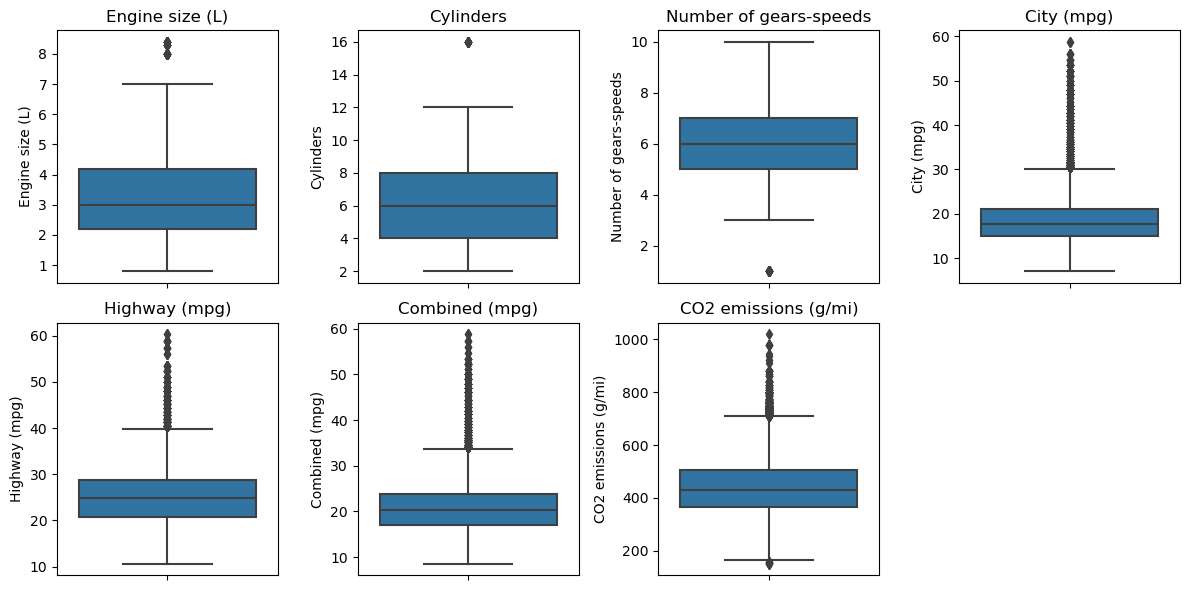

In [98]:
# Boxplots to visualize outliers
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=cdf[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

When there's a good reason, dropping outliers is a common practice to prevent faulty analysis- like when they can be related to data collected by faulty sensors. There are noticable outliers that deserve attention. These include:

- Engine Size and Cylinders include extreme records that upon reviewing the data I confirmed they are genuine records- e.g., supersport cars. So, I decided to keep them.
- There are several cars with just one gear/speed. They need to be investigated.
- Consumption variables include values up to 3 times the center. While there are ICEVs with very high MPGs, this need to be checked. For the extreme values around 60 are more likely to be hybrid cars. In this analysis, I want to exclude them because this project's scope only includes ICEVs and they would negatively impact model training if there is no variable to distinguish them.
- CO₂ emissions includes 38 outliers. These are probably related to sport cars, trucks, or SUV. They need to be explored too.

Let's begin with records with `Number of gears-speeds` < 2.

<h4>3.3.1. Outlier Handling: Number of gears-speeds</h4>

In [102]:
cdf["Number of gears-speeds"][cdf["Number of gears-speeds"] < 2].sum()

28.0

This is implausible, as modern vehicles (including mid-size, compact, and SUVs) typically have at least 4 gears.

**Possible Explanations:**
- Data entry errors or encoding issues.
- Misclassification of Continuously Variable Transmissions (CVT), which may technically be recorded as 1 or 2. I will only consider value =1 since there is no gear/speed value 2 in the dataset.

Since the are only 28 records, let's check them all.

In [105]:
cdf[cdf["Number of gears-speeds"] < 2]

Model year     Make                  Model  \
20922        2021      Kia                    Rio   
20935        2022      Kia                    Rio   
20946        2023      Kia                    Rio   
21934        2021  Hyundai                Elantra   
21935        2021  Hyundai          Elantra (ISG)   
21936        2021  Hyundai                  Venue   
21955        2022  Hyundai                Elantra   
21956        2022  Hyundai          Elantra (ISG)   
21957        2022  Hyundai                  Venue   
21978        2023  Hyundai                Elantra   
21979        2023  Hyundai          Elantra (ISG)   
21980        2023  Hyundai                  Venue   
22000        2024  Hyundai                Elantra   
22001        2024  Hyundai   Elantra (Stop/Start)   
22021        2025  Hyundai                Elantra   
22022        2025  Hyundai   Elantra (Stop/Start)   
22023        2025      Kia                     K4   
22024        2025      Kia       K4 (Without DMS)   
27911        2024  Hyundai                   Kona   
27912        2024  Hyundai      Kona (Stop/Start)   
27913        2024  Hyundai               Kona AWD   
27914        2024  Hyundai  Kona AWD (Stop/Start)   
27915        2024  Hyundai                  Venue   
27956        2025  Hyundai                   Kona   
27957        2025  Hyundai      Kona (Stop/Start)   
27958        2025  Hyundai               Kona AWD   
27959        2025  Hyundai  Kona AWD (Stop/Start)   
27960        2025  Hyundai                  Venue   

                      Vehicle class  Engine size (L)  Cylinders  \
20922                       Compact              1.6          4   
20935                       Compact              1.6          4   
20946                       Compact              1.6          4   
21934                      Mid-size              2.0          4   
21935                      Mid-size              2.0          4   
21936                      Mid-size              1.6          4   
21955                      Mid-size              2.0          4   
21956                      Mid-size              2.0          4   
21957                      Mid-size              1.6          4   
21978                      Mid-size              2.0          4   
21979                      Mid-size              2.0          4   
21980                      Mid-size              1.6          4   
22000                      Mid-size              2.0          4   
22001                      Mid-size              2.0          4   
22021                      Mid-size              2.0          4   
22022                      Mid-size              2.0          4   
22023                      Mid-size              2.0          4   
22024                      Mid-size              2.0          4   
27911  Sport utility vehicle: Small              2.0          4   
27912  Sport utility vehicle: Small              2.0          4   
27913  Sport utility vehicle: Small              2.0          4   
27914  Sport utility vehicle: Small              2.0          4   
27915  Sport utility vehicle: Small              1.6          4   
27956  Sport utility vehicle: Small              2.0          4   
27957  Sport utility vehicle: Small              2.0          4   
27958  Sport utility vehicle: Small              2.0          4   
27959  Sport utility vehicle: Small              2.0          4   
27960  Sport utility vehicle: Small              1.6          4   

      Transmission type  Number of gears-speeds Fuel type  City (mpg)  \
20922                AV                     1.0         X       32.67   
20935                AV                     1.0         X       32.67   
20946                AV                     1.0         X       32.67   
21934                AV                     1.0         X       31.36   
21935                AV                     1.0         X       33.13   
21936                AV                     1.0         X       29.77   
21955         

All vehicles with `Number of gears-speeds < 2` are labeled as **"AV"**, representing **Continuously Variable Transmissions (CVTs)**. 
CVTs provide a seamless range of gear ratios without fixed steps, which likely caused the misreporting of gear values as 1. Since all have similar `Transmission type`, I will replace their gear values with `Vehicle class` specific mode values.

**Why Use Category-Specific Replacement?**
- Different vehicle classes (e.g., compact, SUV) simulate different gear steps to enhance driving experience.
- Using the most common value (mode) specific to each `Vehicle class` preserves the relationship between vehicle type and gear configuration.
- This approach ensures realistic and interpretable values while maintaining model accuracy.

**Approach:**
1. **Identify Affected Records:** Filter records where `Transmission type` is "AV" and `Number of gears-speeds < 2`.
2. **Calculate Mode by Vehicle Class:** Determine the most common simulated gear step for each `Vehicle class`.
3. **Replace with Category-Specific Values:** Impute the mode value specific to each `Vehicle class`.

In [108]:
# Make an Independent Copy
cdf_prepared = cdf.copy()

# Identifying Affected Records
# Filter records for CVTs with suspicious gear values (< 2)
cvt_mask = (cdf_prepared["Transmission type"] == "AV") & (cdf_prepared["Number of gears-speeds"] < 2)
print("\nNumber of Affected CVT Records:", cvt_mask.sum())

# Calculate the mode of `Number of gears-speeds` for each Vehicle Class
cvt_modes = cdf_prepared[~cvt_mask].groupby("Vehicle class")["Number of gears-speeds"].agg(lambda x: x.mode().iloc[0])
print("\nCategory-Specific Mode for CVTs by Vehicle Class:")
print(cvt_modes)


Number of Affected CVT Records: 28

Category-Specific Mode for CVTs by Vehicle Class:
Vehicle class
Compact                            6.0
Full-size                          8.0
Mid-size                           6.0
Minicompact                        6.0
Minivan                            4.0
Pickup truck: Small                5.0
Pickup truck: Standard             4.0
Special purpose vehicle            6.0
Sport utility vehicle              4.0
Sport utility vehicle: Small       6.0
Sport utility vehicle: Standard    8.0
Station wagon: Mid-size            5.0
Station wagon: Small               6.0
Subcompact                         6.0
Two-seater                         6.0
Van: Cargo                         4.0
Van: Passenger                     4.0
Name: Number of gears-speeds, dtype: float64


Now, let's apply the class-specific modes to the outliers.

In [111]:
# Apply the category-specific modes to the affected records
for vehicle_class, mode_value in cvt_modes.items():
    mask = (cdf_prepared["Vehicle class"] == vehicle_class) & cvt_mask
    cdf_prepared.loc[mask, "Number of gears-speeds"] = mode_value

# Verifying Results
cdf_prepared[cvt_mask]  # Check to ensure no values are under 2

Model year     Make                  Model  \
20922        2021      Kia                    Rio   
20935        2022      Kia                    Rio   
20946        2023      Kia                    Rio   
21934        2021  Hyundai                Elantra   
21935        2021  Hyundai          Elantra (ISG)   
21936        2021  Hyundai                  Venue   
21955        2022  Hyundai                Elantra   
21956        2022  Hyundai          Elantra (ISG)   
21957        2022  Hyundai                  Venue   
21978        2023  Hyundai                Elantra   
21979        2023  Hyundai          Elantra (ISG)   
21980        2023  Hyundai                  Venue   
22000        2024  Hyundai                Elantra   
22001        2024  Hyundai   Elantra (Stop/Start)   
22021        2025  Hyundai                Elantra   
22022        2025  Hyundai   Elantra (Stop/Start)   
22023        2025      Kia                     K4   
22024        2025      Kia       K4 (Without DMS)   
27911        2024  Hyundai                   Kona   
27912        2024  Hyundai      Kona (Stop/Start)   
27913        2024  Hyundai               Kona AWD   
27914        2024  Hyundai  Kona AWD (Stop/Start)   
27915        2024  Hyundai                  Venue   
27956        2025  Hyundai                   Kona   
27957        2025  Hyundai      Kona (Stop/Start)   
27958        2025  Hyundai               Kona AWD   
27959        2025  Hyundai  Kona AWD (Stop/Start)   
27960        2025  Hyundai                  Venue   

                      Vehicle class  Engine size (L)  Cylinders  \
20922                       Compact              1.6          4   
20935                       Compact              1.6          4   
20946                       Compact              1.6          4   
21934                      Mid-size              2.0          4   
21935                      Mid-size              2.0          4   
21936                      Mid-size              1.6          4   
21955                      Mid-size              2.0          4   
21956                      Mid-size              2.0          4   
21957                      Mid-size              1.6          4   
21978                      Mid-size              2.0          4   
21979                      Mid-size              2.0          4   
21980                      Mid-size              1.6          4   
22000                      Mid-size              2.0          4   
22001                      Mid-size              2.0          4   
22021                      Mid-size              2.0          4   
22022                      Mid-size              2.0          4   
22023                      Mid-size              2.0          4   
22024                      Mid-size              2.0          4   
27911  Sport utility vehicle: Small              2.0          4   
27912  Sport utility vehicle: Small              2.0          4   
27913  Sport utility vehicle: Small              2.0          4   
27914  Sport utility vehicle: Small              2.0          4   
27915  Sport utility vehicle: Small              1.6          4   
27956  Sport utility vehicle: Small              2.0          4   
27957  Sport utility vehicle: Small              2.0          4   
27958  Sport utility vehicle: Small              2.0          4   
27959  Sport utility vehicle: Small              2.0          4   
27960  Sport utility vehicle: Small              1.6          4   

      Transmission type  Number of gears-speeds Fuel type  City (mpg)  \
20922                AV                     6.0         X       32.67   
20935                AV                     6.0         X       32.67   
20946                AV                     6.0         X       32.67   
21934                AV                     6.0         X       31.36   
21935                AV                     6.0         X       33.13   
21936                AV                     6.0         X       29.77   
21955         

Notice that all new values are 6! this is because there are only three `Vehicle class` among the outliers: ***Compact***, ***Mid-size***, and ***Sport utility vehicle: Small***, all of which has the same mode value for `Number of gears-speed.`

Let's now move on to high consumption cars.

<h4>3.3.2. Outlier Handling: MPGs</h4>

Upon reviewing `Model` variable, I realized 418 records have the term *"hybrid"* in their description! I didn't expect this since the source provides a separate dataset for hybric cars. Let's remove them.

**Why Exclude Hybrids?**
- Hybrid vehicles are out of project scope.
- They have fundamentally different emissions profiles due to dual powertrains (internal combustion engine + electric motor).
- Including hybrids could skew the emissions model and reduce interpretability since they follow different driving cycles.

I checked online sources to find records of hybrid cars and use it as a filter to remove them from my dataset. Unfortunately, I couldn't find a comprehensive dataset that goes back to 1995. Even the available dataset on the source's website only goes back to 2013 with 351 records that most of the model values were absent from here. The U.S. EPA and DOT also have records, but they were only partially helpful. So I decided to make my own solution, which might be imperfect.  

In [115]:
# Remove models containing "Hybrid" (case-insensitive)
cdf_filtered = cdf_prepared[~cdf_prepared["Model"].str.contains("hybrid", case=False, na=False)]

# Print how many rows were removed
print(f"Original dataset size: {cdf.shape[0]}")
print(f"Filtered dataset size: {cdf_filtered.shape[0]}")
print(f"Rows removed due to outliers: {cdf.shape[0] - cdf_filtered.shape[0]}")

Original dataset size: 28384
Filtered dataset size: 27966
Rows removed due to outliers: 418


Next, I need to remove other possible hybrid cars that don't mention the term in their `Model` variable- like Toyota Prius. Hybrid cars have significantly high mpgs, particularly in city conditions (source). While non-hybrid cars can also achieve high mpgs, a high mpg is a good initial marker. To identify potential hybrid cars in the dataset, I look into vehicles with `City (mpg)` equal or greater than 32. From there, I mannually inspect unique records to make sure I do not remove a non-hybrid car.

In [118]:
# Find unique model names with `City (mpg) >= 32`
high_mpg_models = cdf_filtered[cdf_filtered["City (mpg)"] >= 32]["Model"].unique()
high_mpg_models

array(['Metro', 'Firefly', 'New Beetle TDI Diesel', 'Insight',
       'Golf TDI Diesel', 'Jetta TDI Diesel', 'New Golf TDI Diesel',
       'New Jetta TDI Diesel', 'Mirage', 'Mirage G4', 'fortwo CDI',
       'fortwo CDI cabriolet', 'Passat TDI Diesel',
       'Passat Wagon TDI Diesel', 'Jetta Wagon TDI Diesel',
       'fortwo convertible', 'fortwo coupe', 'fortwo', 'fortwo cabriolet',
       'ES 300h', 'Yaris', 'Prius', 'Insight EX', 'HS 250h',
       'Insight DX/LX', 'CT 200h', 'Insight LX', 'Prius c', 'Versa',
       'UX 250h', 'UX 250h AWD', 'Accent', 'Rio', 'Insight Touring',
       'UX 300h AWD', 'Prius AWD', 'Insight EX/Touring', 'Elantra (ISG)',
       'Crown AWD', 'Elantra (Stop/Start)', 'Sentra', 'Camry',
       'Camry AWD SE/XLE', 'Camry AWD XSE', 'Fit', 'Crown Signia AWD',
       'iQ', 'Niro', 'Niro FE', 'Niro Touring', 'CR-Z', 'Sienna',
       'Sienna AWD', 'Prius v', 'NX 300h AWD', 'Venza AWD', 'NX 350h AWD',
       'RX 350h AWD', 'IONIQ', 'IONIQ Blue'], dtype=object)

I investigated all the list items thrhough online resources and identified hybrid cars.

In [121]:
# Creat a list of hybrid cars from the above list by manually removing known ICEVs (informed by online search)
hybrid_models = ['CR-Z', 'Crown AWD', 'Crown Signia AWD',
                 'ES 300h', 'HS 250h', 'IONIQ', 'IONIQ Blue', 
                 'Insight', 'Insight DX/LX', 'Insight EX', 
                 'Insight EX/Touring', 'Insight LX', 'Insight Touring', 
                 'NX 300h AWD', 'NX 350h AWD', 'Niro', 'Niro FE', 'Niro Touring', 
                 'Prius', 'Prius AWD', 'Prius c', 'Prius v', 'RX 350h AWD',
                 'Sienna', 'Sienna AWD', 'UX 250h', 'UX 250h AWD', 'UX 300h AWD', 'Venza AWD']

Let's see the make and model of hybrid cars that don't contain the term in their `Model` description:

In [124]:
# Show the hybrid models and their "Make" values
hybrid_models_df = cdf_filtered[cdf_filtered["Model"].isin(hybrid_models)][["Make", "Model"]].drop_duplicates()

# Sort alphabetically
hybrid_models_df = hybrid_models_df.sort_values(by=["Make", "Model"])

# Convert to single formatted string
hybrid_models_str = ", ".join(hybrid_models_df["Make"] + " " + hybrid_models_df["Model"])

# Print result
print("Models identified manually as hybrids (sorted):")
print(hybrid_models_str)

Models identified manually as hybrids (sorted):
Honda CR-Z, Honda Insight, Honda Insight DX/LX, Honda Insight EX, Honda Insight EX/Touring, Honda Insight LX, Honda Insight Touring, Hyundai IONIQ, Hyundai IONIQ Blue, Kia Niro, Kia Niro FE, Kia Niro Touring, Lexus ES 300h, Lexus HS 250h, Lexus NX 300h AWD, Lexus NX 350h AWD, Lexus RX 350h AWD, Lexus UX 250h, Lexus UX 250h AWD, Lexus UX 300h AWD, Toyota Crown AWD, Toyota Crown Signia AWD, Toyota Prius, Toyota Prius AWD, Toyota Prius c, Toyota Prius v, Toyota Sienna, Toyota Sienna AWD, Toyota Venza AWD


Beside these, all 2025 Toyota Camry vehicles are hybrid (Not mentioned in the `Model`). They also need to be removed.

In [127]:
# Remove the remaining models from `cdf`
cdf_filtered = cdf_filtered[~cdf_filtered["Model"].isin(hybrid_models)]

# Remove only 2025 Toyota Camry models
cdf_filtered = cdf_filtered[~((cdf_filtered["Model year"] == 2025) & 
                        (cdf_filtered["Make"] == "Toyota") & 
                        (cdf_filtered["Model"].str.contains("Camry", case=False, na=False)))]

# Print how many rows were removed
print(f"Original dataset size: {cdf.shape[0]}")
print(f"Filtered dataset size: {cdf_filtered.shape[0]}")
print(f"Total Rows removed due to outliers: {cdf.shape[0] - cdf_filtered.shape[0]}")
print("\nTotal # of Possible Outliers:", outliers_iqr.sum(), " based on modified IQR method.")

Original dataset size: 28384
Filtered dataset size: 27742
Total Rows removed due to outliers: 642

Total # of Possible Outliers: 671  based on modified IQR method.


Almost all potential outliers have been removed so far. Let's check the last variable.

<h4>3.3.3. Outlier Handling: CO₂ emission rates</h4>

Now, let's look at the cars with extreme CO₂ emission rates. What can one learn from those with values above 850 (g/mi)?

In [131]:
# Filter records where CO2 emission rates are above 850
high_emission_records = cdf_filtered[cdf_filtered['CO2 emissions (g/mi)'] > 850]

# Select only numerical columns
numerical_features = high_emission_records.select_dtypes(include=['number'])

high_emission_records.describe()

Model year  Engine size (L)  Cylinders  Number of gears-speeds  \
count    29.000000        29.000000  29.000000               29.000000   
mean   2012.551724         7.037931  13.379310                6.310345   
std       8.801730         0.983584   2.144991                0.929802   
min    1997.000000         5.500000  10.000000                4.000000   
25%    2007.000000         6.500000  12.000000                6.000000   
50%    2010.000000         6.500000  12.000000                7.000000   
75%    2021.000000         8.000000  16.000000                7.000000   
max    2025.000000         8.300000  16.000000                7.000000   

       City (mpg)  Highway (mpg)  Combined (mpg)  CO2 emissions (g/mi)  
count   29.000000      29.000000       29.000000             29.000000  
mean     8.111034      12.582414        9.653448            909.334828  
std      0.328072       0.998730        0.484549             48.619126  
min      7.060000      11.250000        8.550000            859.390000  
25%      7.790000      11.470000        9.300000            880.310000  
50%      8.250000      12.780000        9.880000            880.310000  
75%      8.310000      13.070000        9.880000            943.080000  
max      8.650000      14.170000       10.270000           1018.720000

In [133]:
# Get unique values for 'Make' and 'Vehicle class' where CO2 emission rates > 850
unique_makes = high_emission_records['Make'].unique()
unique_vehicle_classes = high_emission_records['Vehicle class'].unique()

print(unique_makes)
print(unique_vehicle_classes)

['Ferrari' 'Lamborghini' 'Dodge' 'Bugatti']
['Subcompact' 'Two-seater' 'Pickup truck: Standard']


Upon further exploration of these vehicles, I found out they are genuine records of, for instance high-end supersport cars and pickup trucks, and the reported CO₂ values are correct.

When there's a good reason, dropping outliers is a common practice to prevent faulty analysis- like when the can be related to data collected by faulty sensors. In our case, I decided to keep CO₂ outliers for two reasons:
- The data collection seems sound and the records are for real cars. As such, they can provide valuable information to develop a more robust model.
- There are ways to ensure the prediction model would not be affected negatively by the outliers. I will apply these in the modeling sections- For instance:
    - Use **Ridge regression** in modeling to account for the influence of outliers through regularization.
    - Perform **sensitivity analysis** to compare model performance with and without outliers- the results were in favor of keeping theses outliers.

Now, let's inspect our data visually again.

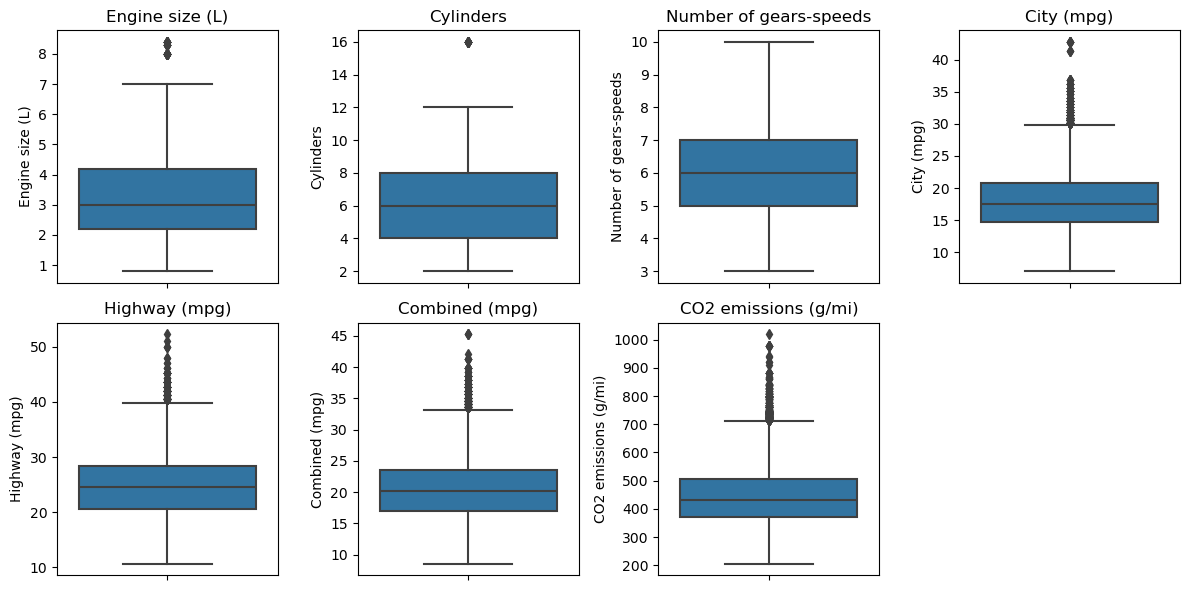

In [136]:
# Boxplots to visualize outliers
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=cdf_filtered[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

While there still are significant outliers, they represent important real variation that can contribute to a better prediction for extreme cases. 

<h3>3.4. Final Checks: Duplicates and NAs</h3> 

Before wrapping up data preparation, let's check if there is any duplicate record.

In [140]:
# Check for duplicate rows
cdf_filtered.duplicated().sum()

5

Let's do a final checking for Null values to ensure the dataset has not been impacted unintentionally and it's ready for analysis.

In [143]:
cdf_filtered.isnull().sum()

Model year                0
Make                      0
Model                     0
Vehicle class             0
Engine size (L)           0
Cylinders                 0
Transmission type         0
Number of gears-speeds    0
Fuel type                 0
City (mpg)                0
Highway (mpg)             0
Combined (mpg)            0
CO2 emissions (g/mi)      0
dtype: int64

Now that the data is ready, let's save the cleaned data before moving to the next part.

In [148]:
cdf_filtered.to_csv("/Users/hasan/CO2/data/cleaned_data_wx.csv", index=False)
print("Cleaned data saved successfully!")

Cleaned data saved successfully!


<h2 style="
    background-color: #064E3B; 
    color: #A7F3D0; 
    padding: 15px; 
    border-radius: 5px;
    font-size: 28px;
    margin-top: 20px;
">
    4. Explanatory Data Analysis (EDA)
    <a class="anchor" id="eda" style="margin: 10;"></a>
</h2>

Exploratory Data Analysis (EDA) is a crucial step in any data science project as it helps to:
- Understand the structure, distribution, and quality of the data.
- Identify relationships and correlations between variables.
- Detect outliers, anomalies, or patterns that may influence model performance.
- Gain insights that guide further feature selection and engineering.

This EDA will cover:
- **Univariate Analysis**:
    - Investigate the distribution of individual variables, including numerical and categorical features.
    - Identify any skewness, kurtosis, or outliers in numerical variables.
    - Understand the frequency distributions for categorical variables.
- **Bivariate Analysis**:
    - Explore relationships between the target variable (`CO₂ emissions (g/km)`) and predictor variables.
    - Investigate correlations among numerical variables.
    - Examine the influence of categorical variables (e.g., `Fuel type`, `Transmission type`) on CO₂ emission rates.
- **Multivariate Analysis**:
    - Examine interactions among multiple variables to understand complex dependencies.
    - Identify potential multicollinearity issues among predictors.

Diverse visualization will be used here to investigate the relationships, including:
- Histograms, Density Plots, and Scatter plots for numerical variables
- Bar plots for categorical variables
- Boxplots and Violin plots for categorical vs. numerical interactions.
- Correlation heatmaps for quick correlation insights.
- Pairplots to explore pairwise relationships.

This comprehensive EDA will not only help us understand the data but also guide us in making informed decisions during the modeling phase.

In [152]:
cdf = cdf_filtered.copy()
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27742 entries, 0 to 28382
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Model year              27742 non-null  int64  
 1   Make                    27742 non-null  object 
 2   Model                   27742 non-null  object 
 3   Vehicle class           27742 non-null  object 
 4   Engine size (L)         27742 non-null  float64
 5   Cylinders               27742 non-null  int64  
 6   Transmission type       27742 non-null  object 
 7   Number of gears-speeds  27742 non-null  float64
 8   Fuel type               27742 non-null  object 
 9   City (mpg)              27742 non-null  float64
 10  Highway (mpg)           27742 non-null  float64
 11  Combined (mpg)          27742 non-null  float64
 12  CO2 emissions (g/mi)    27742 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 3.0+ MB


Before moving further, let's group numerical and categorical features.

In [155]:
numerical_cols = ["Model year", "Engine size (L)", "Cylinders", "Number of gears-speeds", "City (mpg)", "Highway (mpg)", "Combined (mpg)", "CO2 emissions (g/mi)"]
categorical_cols = ["Make", "Model", 'Vehicle class', "Transmission type", "Fuel type"]

<h3>4.1. Univariate Analysis</h3> 
<h4>4.1.1. Numerical Features</h4>

Let's check eight numerical variables:

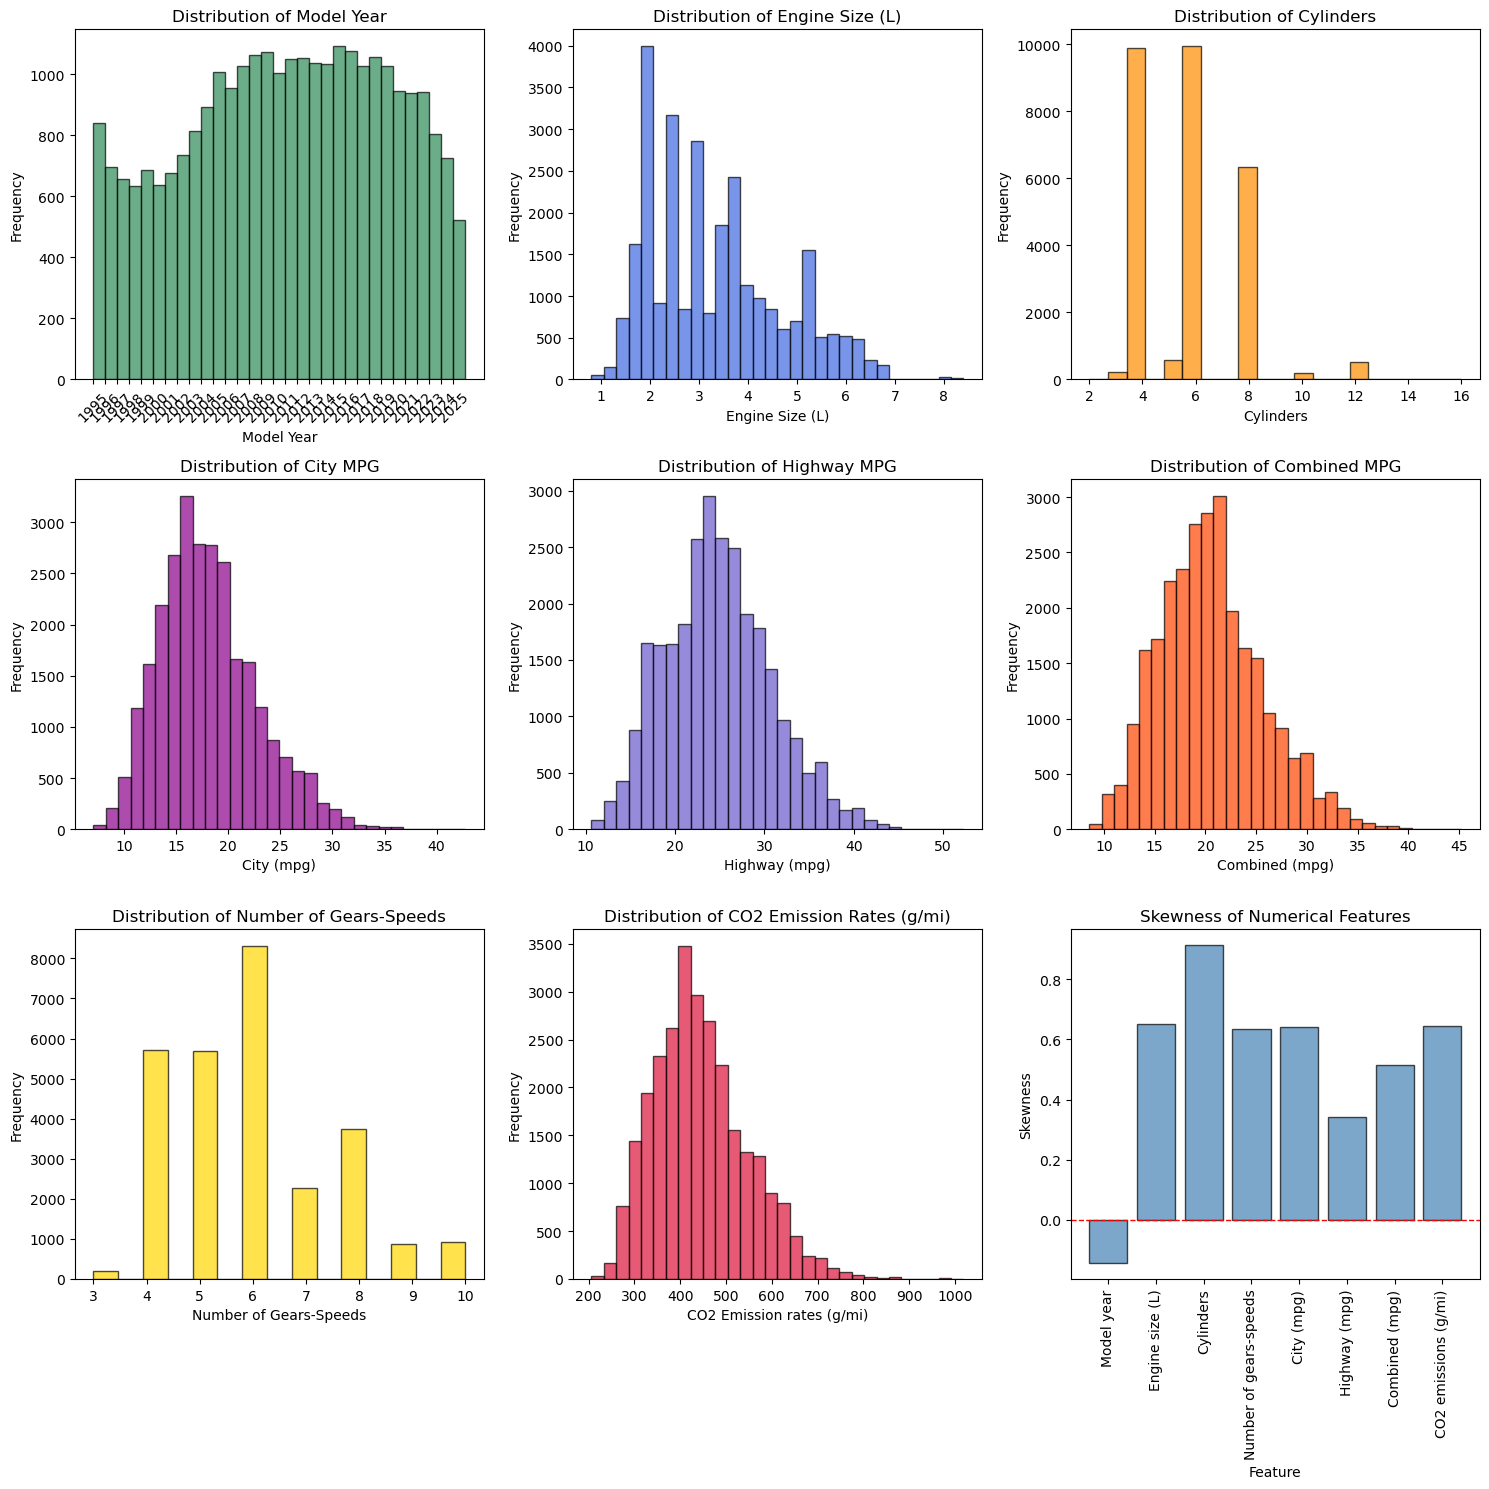

In [160]:
# Create a 2x2 subplot layout
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Histogram for "Model Year"
# Ensure each Model Year is in its own bin
unique_years = sorted(cdf["Model year"].dropna().unique())  # Get sorted unique years
bins = range(min(unique_years), max(unique_years) + 2)  # Create bins for each year

axes[0, 0].hist(cdf["Model year"].dropna(), bins=bins, color="seagreen", edgecolor="black", alpha=0.7)
axes[0, 0].set_title("Distribution of Model Year")
axes[0, 0].set_xlabel("Model Year")
axes[0, 0].set_ylabel("Frequency")

# Adjust x-axis ticks to show each year clearly
axes[0, 0].set_xticks(unique_years)
axes[0, 0].tick_params(axis='x', rotation=45)  # Rotate labels for better visibility

# Histogram for Engine Size
axes[0, 1].hist(cdf["Engine size (L)"].dropna(), bins=30, color="royalblue", edgecolor="black", alpha=0.7)
axes[0, 1].set_title("Distribution of Engine Size (L)")
axes[0, 1].set_xlabel("Engine Size (L)")
axes[0, 1].set_ylabel("Frequency")

# Histogram for Cylinders
axes[0, 2].hist(cdf["Cylinders"].dropna(), bins=20, color="darkorange", edgecolor="black", alpha=0.7)
axes[0, 2].set_title("Distribution of Cylinders")
axes[0, 2].set_xlabel("Cylinders")
axes[0, 2].set_ylabel("Frequency")

# Histogram for City MPG
axes[1, 0].hist(cdf["City (mpg)"].dropna(), bins=30, color="#8B008B", edgecolor="black", alpha=0.7) #Colore = Dark Magenta
axes[1, 0].set_title("Distribution of City MPG")
axes[1, 0].set_xlabel("City (mpg)")
axes[1, 0].set_ylabel("Frequency")

# Histogram for Highway MPG
axes[1, 1].hist(cdf["Highway (mpg)"].dropna(), bins=30, color="#6A5ACD", edgecolor="black", alpha=0.7) #Colore = Slate Blue
axes[1, 1].set_title("Distribution of Highway MPG")
axes[1, 1].set_xlabel("Highway (mpg)")
axes[1, 1].set_ylabel("Frequency")

# Histogram for Combined MPG
axes[1, 2].hist(cdf["Combined (mpg)"].dropna(), bins=30, color="#FF4500", edgecolor="black", alpha=0.7) #Colore = Orange Red
axes[1, 2].set_title("Distribution of Combined MPG")
axes[1, 2].set_xlabel("Combined (mpg)")
axes[1, 2].set_ylabel("Frequency")

# Histogram for "Number of Gears-Speeds"
axes[2, 0].hist(cdf["Number of gears-speeds"].dropna(), bins=15, color="#FFD700", edgecolor="black", alpha=0.7) #Colore = Gold
axes[2, 0].set_title("Distribution of Number of Gears-Speeds")
axes[2, 0].set_xlabel("Number of Gears-Speeds")
axes[2, 0].set_ylabel("Frequency")

# Histogram for CO2 Emission rates
axes[2, 1].hist(cdf["CO2 emissions (g/mi)"].dropna(), bins=30, color="crimson", edgecolor="black", alpha=0.7)
axes[2, 1].set_title("Distribution of CO2 Emission Rates (g/mi)")
axes[2, 1].set_xlabel("CO2 Emission rates (g/mi)")
axes[2, 1].set_ylabel("Frequency")

# Calculate Skewness
skewness_values = cdf[numerical_cols].skew()

# Plot skewness as a bar chart in the 9th subplot
axes[2, 2].bar(skewness_values.index, skewness_values.values, color="steelblue", edgecolor="black", alpha=0.7)
axes[2, 2].axhline(0, color='red', linestyle='--', linewidth=1)  # Horizontal line at zero
axes[2, 2].set_title("Skewness of Numerical Features")
axes[2, 2].set_xlabel("Feature")
axes[2, 2].set_ylabel("Skewness")
axes[2, 2].tick_params(axis='x', rotation=90)

# Adjust layout for better readability
plt.tight_layout()
plt.show()


**Key Observations:**
- All numerical features are, more or less, skewed (check the last figure):
    - `Model year` is slightly skewed: more recent cars dominate. 
    - CO₂ emission rates appear right-skewed, with most values clustering at lower rates.
- Most vehicles have small engine sizes with very few above 6.5L.
- Most cars have 4, 6, or 8 cylinders abd higher cylinders (10, 12, 16) are rare.
- MPG (city, highway, combined) does not have a normal distribution and has some extreme values. Since hybrid cars were removed, these are high-efficiency cars.
- Most cars have 6 gears/speed or less.

<h4>4.1.2. Categorical Features</h4>

Let's check categorical variables now.

In [164]:
# Count unique values per categorical column
cdf[categorical_cols].nunique()

Make                   55
Model                4257
Vehicle class          17
Transmission type       5
Fuel type               5
dtype: int64

I will focus on the last three.

**Vehicle Class**

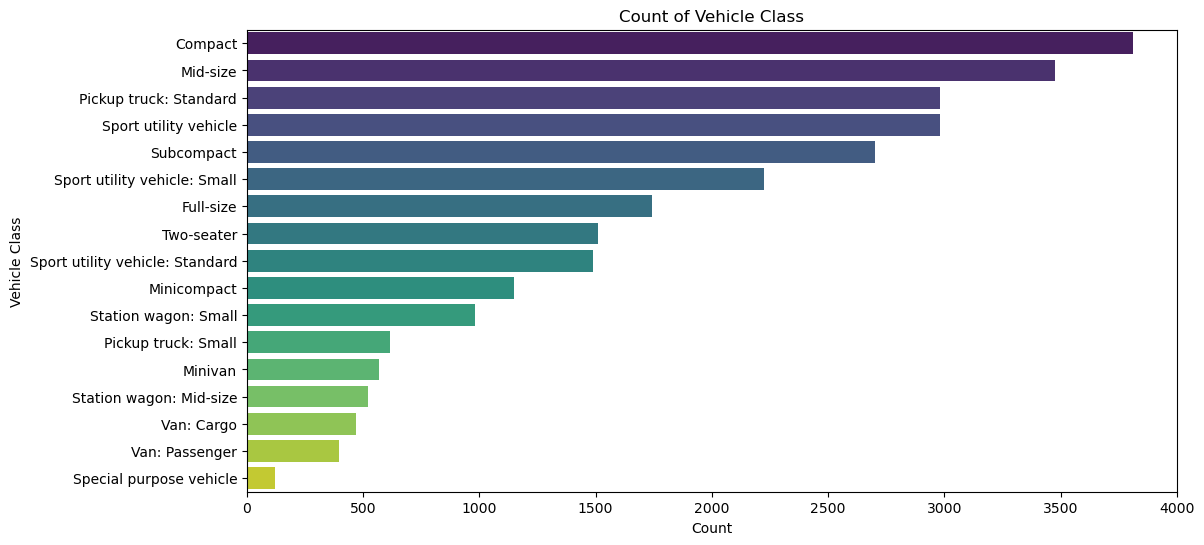

In [168]:
# Bar plot for Count of Vehicle Class

plt.figure(figsize=(12, 6))
order = cdf["Vehicle class"].value_counts().index  # Order by frequency
sns.countplot(y=cdf["Vehicle class"], order=order, palette="viridis")
plt.title("Count of Vehicle Class")
plt.xlabel("Count")
plt.ylabel("Vehicle Class")
plt.show()

**Observations:**
- Compact and Mid-size cars are the most frequent, suggesting a dataset dominated by passenger cars.
- Standard Pickup Trucks and SUVs also have high representation.
- Special Purpose Vehicles, Vans (Passenger & Cargo), and Station Wagons have the lowest counts- probably due to lower consumer demand.
- Standard Pickup Trucks are more common than Small Pickups.

More order and insights might be gained by transofrming the `Vehicle class` and forming a simpler categorization. However, I decided not to follow this path for now.

**Fuel Type**

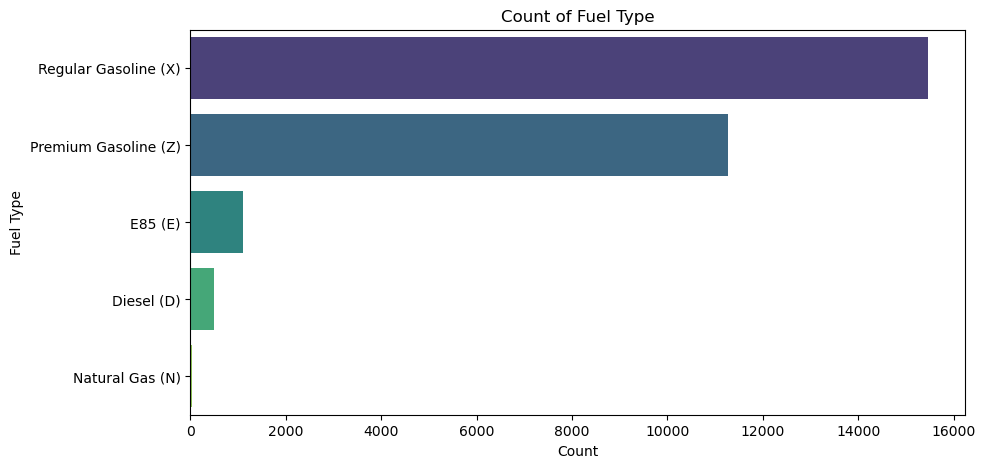

In [172]:
# Mapping fuel type codes to their labels
fuel_type_labels = {"X": "Regular Gasoline (X)", "Z": "Premium Gasoline (Z)", "D": "Diesel (D)", "E": "E85 (E)", "N": "Natural Gas (N)"}

# Bar plot for Fuel Type count
plt.figure(figsize=(10, 5))
order = cdf["Fuel type"].map(fuel_type_labels).value_counts().index  # Order by frequency
sns.countplot(y=df["Fuel type"].map(fuel_type_labels), order=order, palette="viridis")
plt.title("Count of Fuel Type")
plt.xlabel("Count")
plt.ylabel("Fuel Type")
plt.show()

The U.S. Department of Energy (DOE) says: "E85 (or Flex Fuel) is a term that refers to high-level ethanol-gasoline blends containing 51% to 83% ethanol, depending on geography and season. For more information, check [Fuel Properties](https://afdc.energy.gov/fuels/fuel_properties.php) and [E85 Flex Fuel Specification](https://afdc.energy.gov/fuels/ethanol-e85-specs).

**Observations:**
- Most dataset's cars use gas (regular and premium), suggesting traditional ICEVs are the vast majority of records.
- cars using flex fuel or diesel are less common.
- A rare set of cars use natural gas.
- Since gasoline is dominant, MPGs and CO₂ emission rates trends will mostly reflect gasoline vehicles.

**Transmission Type** 

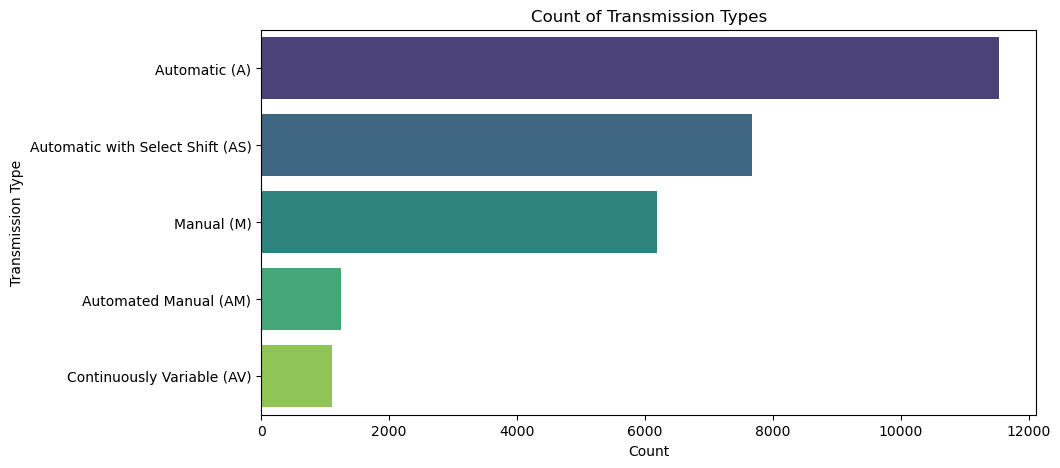

In [176]:
# Define transmission code labels for display only (not modifying data)
transmission_labels = {
    "A": "Automatic (A)",
    "AM": "Automated Manual (AM)",
    "AS": "Automatic with Select Shift (AS)",
    "AV": "Continuously Variable (AV)",
    "M": "Manual (M)"
}

# Create a count plot for transmission types
plt.figure(figsize=(10, 5))
order = cdf["Transmission type"].value_counts().index  # Order by frequency
ax = sns.countplot(y=cdf["Transmission type"], order=order, palette="viridis")

# Replace y-axis labels with descriptive names
ax.set_yticklabels([transmission_labels.get(label, label) for label in order])

# Set labels and title
plt.title("Count of Transmission Types")
plt.xlabel("Count")
plt.ylabel("Transmission Type")

# Show the plot
plt.show()

**Observations:**
- Standard Automatic (A) and Automatic with Select Shift (AS) are the most common. This reflects industry trends, where automatics are preferred due to ease of use and fuel efficiency improvements.
- Manual (M) transmissions still have a noticeable share, but they are much less common than automatics. This aligns with consumer preference shifts, particularly in the U.S.
- Automated Manual (AM) and Continuously Variable (AV) transmissions are the least common. CVTs are generally found in hybrids and economy cars, but they are still underrepresented here.

**Summary of Univariate Analysis:**
- All features exhibit skewness and non-normal distribution.
- Appropriate measures need to be taken when it comes to modeling.

<h3>4.2. Bivariate Analysis</h3>
<h4>4.2.1. Numerical Features</h4>

First, I will check the relationship between CO₂ emission rates and the numerical variables.

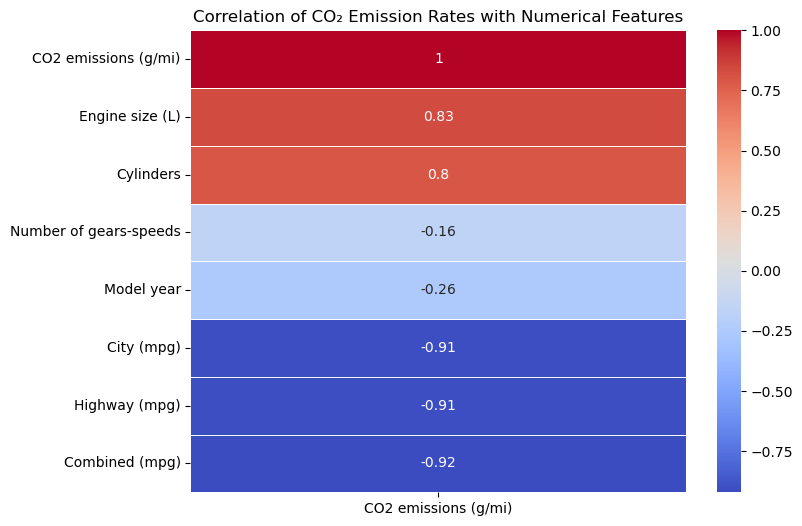

In [182]:
# Compute correlation matrix focusing on CO2 emission rates
correlation_matrix = cdf[numerical_cols].corr()

# Extract correlation values for CO2 emission rates
co2_correlations = correlation_matrix["CO2 emissions (g/mi)"].sort_values(ascending=False)

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[["CO2 emissions (g/mi)"]].sort_values(by="CO2 emissions (g/mi)", ascending=False), 
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation of CO₂ Emission Rates with Numerical Features")
plt.show()

**Observations:**
- Strong Positive Correlation with Engine Size (0.83) & Cylinders (0.80)
    - Larger engines with more cylinders generally produce higher emissions due to higher fuel consumption.
- Strong Negative Correlation with Fuel Efficiency (MPG) (~-0.91 to -0.92)
    - As fuel efficiency increases (higher MPG), CO₂ emission rates decrease significantly.
- Weak Negative Correlation with Model Year (-0.26)
    - Newer model years tend to have lower CO₂ emission rates, likely due to technological advancements and stricter emissions regulations.
    - The correlation is not very strong, suggesting that other factors (engine size, fuel type) play a larger role.
- Weak Negative Correlation with Number of Gears (-0.16)
    - Higher gear counts slightly reduce emission rates, but the effect is weak.
    - Modern vehicles with more gears optimize fuel efficiency, but it’s not a major determining factor for CO₂ emission rates.

In [185]:
correlation_matrix

Model year  Engine size (L)  Cylinders  \
Model year                1.000000        -0.061150  -0.045283   
Engine size (L)          -0.061150         1.000000   0.910163   
Cylinders                -0.045283         0.910163   1.000000   
Number of gears-speeds    0.773283        -0.005112   0.046226   
City (mpg)                0.268576        -0.801526  -0.759640   
Highway (mpg)             0.248363        -0.757978  -0.700287   
Combined (mpg)            0.263759        -0.796303  -0.748332   
CO2 emissions (g/mi)     -0.256564         0.832686   0.796120   

                        Number of gears-speeds  City (mpg)  Highway (mpg)  \
Model year                            0.773283    0.268576       0.248363   
Engine size (L)                      -0.005112   -0.801526      -0.757978   
Cylinders                             0.046226   -0.759640      -0.700287   
Number of gears-speeds                1.000000    0.162155       0.173467   
City (mpg)                            0.162155    1.000000       0.948382   
Highway (mpg)                         0.173467    0.948382       1.000000   
Combined (mpg)                        0.167099    0.992908       0.978838   
CO2 emissions (g/mi)                 -0.162987   -0.907839      -0.912371   

                        Combined (mpg)  CO2 emissions (g/mi)  
Model year                    0.263759             -0.256564  
Engine size (L)              -0.796303              0.832686  
Cylinders                    -0.748332              0.796120  
Number of gears-speeds        0.167099             -0.162987  
City (mpg)                    0.992908             -0.907839  
Highway (mpg)                 0.978838             -0.912371  
Combined (mpg)                1.000000             -0.920972  
CO2 emissions (g/mi)         -0.920972              1.000000

**New Observations:**
- Strong Positive Correlations (Highly Related Features)
    - Engine Size (L) & Cylinders (0.91) → Larger engines typically have more cylinders.
        - Strong collinearity
    - City, Highway, and Combined MPG (~0.99) → Strong interdependence, as expected in fuel efficiency metrics.
        - Extreme collinearity
    - CO₂ Emission rates & Engine Size (0.83), Cylinders (0.80) → Bigger engines with more cylinders emit more CO₂.
    - Model Year & Number of Gears (0.77) → Newer cars tend to have more gears, likely for fuel efficiency improvements.
        - Moderate collinearity
- Strong Negative Correlations (Inverse Relationships)
    - Fuel Efficiency (MPG) & CO₂ Emission rates (~-0.91 to -0.92) → Higher MPG means lower rates.
    - Engine Size vs. City MPG (-0.80) & Highway MPG (-0.76) → Bigger engines reduce fuel efficiency.
    - Cylinders vs. City MPG (-0.76) & Highway MPG (-0.70) → More cylinders also lower efficiency.
- Weak or Moderate Correlations
    - Model Year & CO₂ Emission rates (-0.25) → Newer models slightly reduce rates, but the effect is weak.
    - Number of Gears & CO₂ Emission rates (-0.16) → More gears slightly reduce  rates but are not a major factor.

An interesting point here is that while `Model year` and `CO2 emissions (g/mi)` have a week negative correlation, `Model year` and `Number of gears-speeds` have a strong positive correlation.
This means a newer model tend to have more gears and lower emission rates. Nonetheless, a new model that has equal or fewer gears than a similar older one **might not** emit less emissions. Since *correlation is not causation*, we cannot say more.  

Collinearity refers to high correlations between independent variables (features), which can cause instability in certain Machine Learning models. These need to be addressed later.

Let's check six figures to see these insights visually.

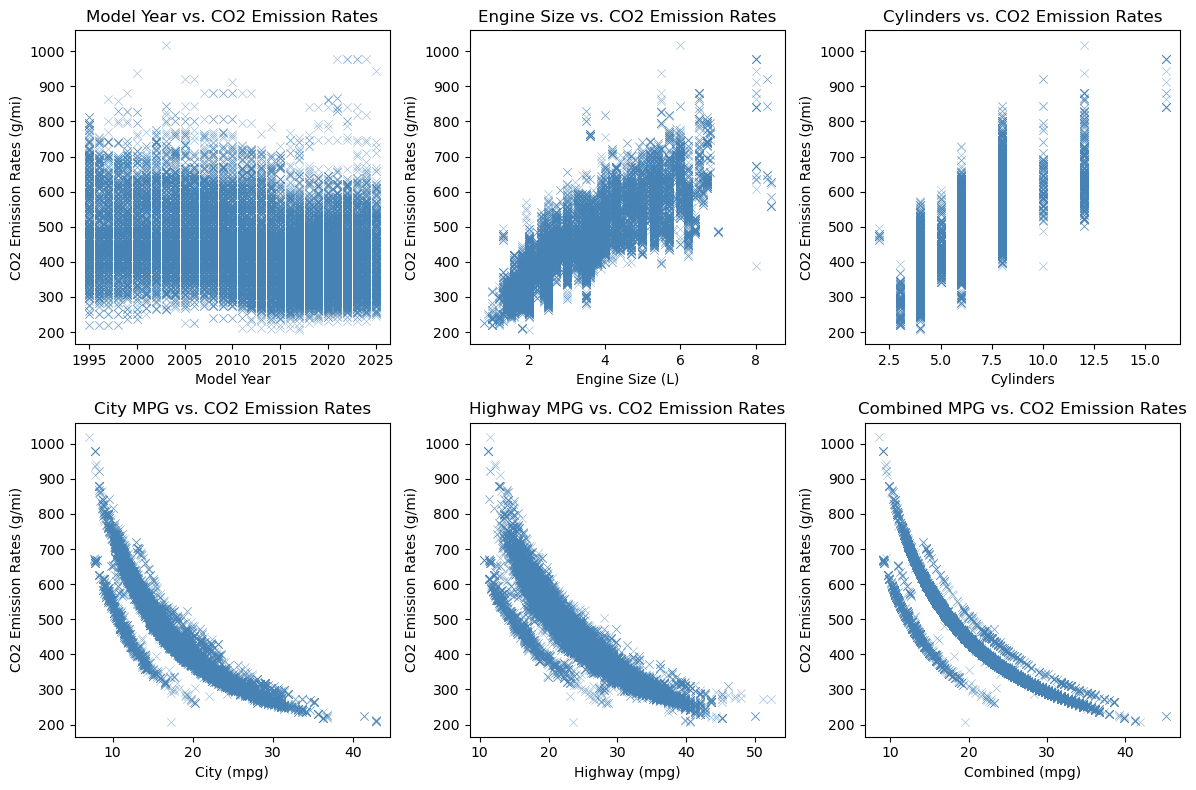

In [191]:
# Create a 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Common settings
scatter_kws = {'alpha': 0.5, 'marker': 'x', 'color': '#4682B4'}  # Cross marker, blue color

# Model Year vs. CO2 Emission rates
sns.scatterplot(x=cdf["Model year"], y=cdf["CO2 emissions (g/mi)"], ax=axes[0, 0], **scatter_kws)
axes[0, 0].set_title("Model Year vs. CO2 Emission Rates")
axes[0, 0].set_xlabel("Model Year")
axes[0, 0].set_ylabel("CO2 Emission Rates (g/mi)")

# Engine Size vs. CO2 Emission rates
sns.scatterplot(x=cdf["Engine size (L)"], y=cdf["CO2 emissions (g/mi)"], ax=axes[0, 1], **scatter_kws)
axes[0, 1].set_title("Engine Size vs. CO2 Emission Rates")
axes[0, 1].set_xlabel("Engine Size (L)")
axes[0, 1].set_ylabel("CO2 Emission Rates (g/mi)")

# Cylinders vs. CO2 Emission rates
sns.scatterplot(x=cdf["Cylinders"], y=cdf["CO2 emissions (g/mi)"], ax=axes[0, 2], **scatter_kws)
axes[0, 2].set_title("Cylinders vs. CO2 Emission Rates")
axes[0, 2].set_xlabel("Cylinders")
axes[0, 2].set_ylabel("CO2 Emission Rates (g/mi)")

# City MPG vs. CO2 Emission rates
sns.scatterplot(x=cdf["City (mpg)"], y=cdf["CO2 emissions (g/mi)"], ax=axes[1, 0], **scatter_kws)
axes[1, 0].set_title("City MPG vs. CO2 Emission Rates")
axes[1, 0].set_xlabel("City (mpg)")
axes[1, 0].set_ylabel("CO2 Emission Rates (g/mi)")

# Highway MPG vs. CO2 Emission rates
sns.scatterplot(x=cdf["Highway (mpg)"], y=cdf["CO2 emissions (g/mi)"], ax=axes[1, 1], **scatter_kws)
axes[1, 1].set_title("Highway MPG vs. CO2 Emission Rates")
axes[1, 1].set_xlabel("Highway (mpg)")
axes[1, 1].set_ylabel("CO2 Emission Rates (g/mi)")

# Combined MPG vs. CO2 Emission rates
sns.scatterplot(x=cdf["Combined (mpg)"], y=cdf["CO2 emissions (g/mi)"], ax=axes[1, 2], **scatter_kws)
axes[1, 2].set_title("Combined MPG vs. CO2 Emission Rates")
axes[1, 2].set_xlabel("Combined (mpg)")
axes[1, 2].set_ylabel("CO2 Emission Rates (g/mi)")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

These figures illustrate the correlation between the numerical features and CO₂ emission rates. They illustrate the points discussed visually. Other observations include:
- High variance in `Model year` vs. `CO2 emissions`: Despite a slight overall decline, high-emission vehicles still exist in newer cars- likely due to large engines and trucks/SUVs.
- Engine Size vs. CO₂ Emission rates: there are relatively few cars beyond 7L engine size, with a high variance.
- Cylinders vs. CO₂ Emission rates: rates increases as number of cylinders increase, not smoothly but rather in clusters (e.g., V4, V6, V8).
- MPGs vs. CO₂ Emission rates: the curved relationships point to non-linearity and suggest diminishing returns— improvements in high-MPG vehicles impact emission rates less.
- Combined MPG vs. CO₂ Emission rates: most structured inverse relationship (strongest correlation). The curve implicates a non-linear relationship.

Let's visualize the correlation matrix and investigate the implications.

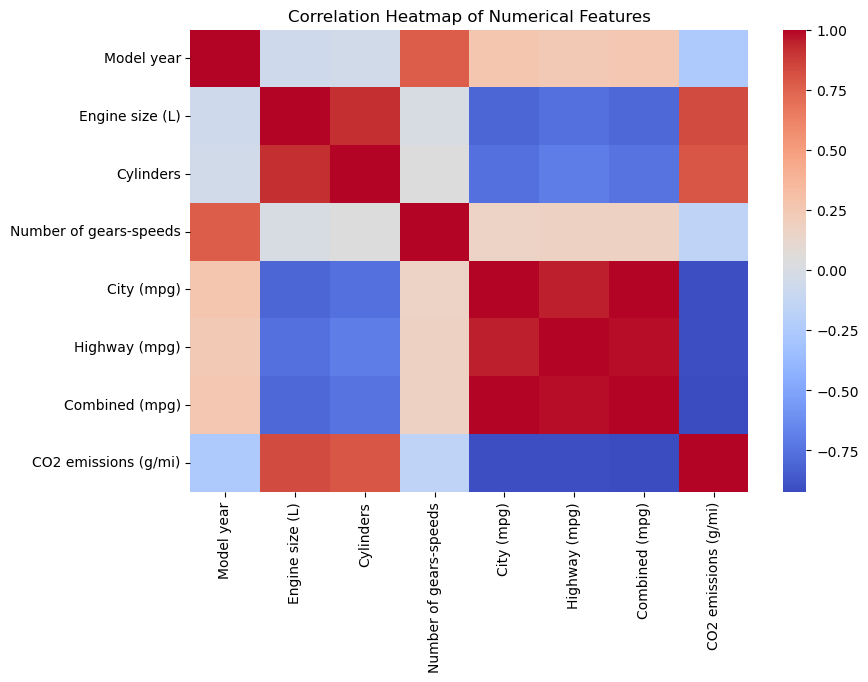

In [194]:
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Observations:** In addition to the correlations between features and `CO2 emissions (g/mi)` that has already been discussed, we observe:
- Strong Multicollinearity Among Several Features: 
    - `Engine size` and `Cylinders`: Positive
    - `City (mpg)`, `Highway (mpg)`, and `Combined (mpg)`: Positive
    - `Engine size` and consumptions (MPGs): Negative
    - `Cylinders` and consumptions (MPGs): Negative
        - Including all correlated features might introduce multicollinearity, which can distort regression coefficients and reduce model interpretability.
- Week Correlation:
    - `Model year` with Consumptions (MPGs): Positive
    - `Number of gears-speeds` with Consumptions (MPGs): Positive
        - Newer vehicles and those with more gears generally have better fuel efficiency.
        - These features are indirectly related to emissions and can enhance model performance when combined with fuel efficiency metrics.
        - Using it as a feature in non-linear models could help capture complex interactions.


**Recommendations for Modeling:**
- Feature Selection and Dimensionality Reduction:
    - Use one or two of the fuel efficiency metrics (preferably one) to avoid multicollinearity.
- Advanced Modeling Techniques:
    - Ridge Regression or Lasso Regression: These regularization techniques can handle multicollinearity while maintaining predictive power.
    - Random Forests or Gradient Boosting: Can handle correlated features and capture non-linear interactions.
    - XGBoost or LightGBM: Suitable for this structured data with complex interactions.
- Interaction Terms and Polynomial Features:
    - Include interaction terms (e.g., between Number of gears-speeds and consumption metrics) to capture the efficiency dynamics.
    - Add polynomial features (e.g., Engine size (L)²) to capture non-linear effects.

<h4>4.2.2. Categorical Features</h4>

Now, it's time to see how categorical variables relate to CO₂ emission rates.

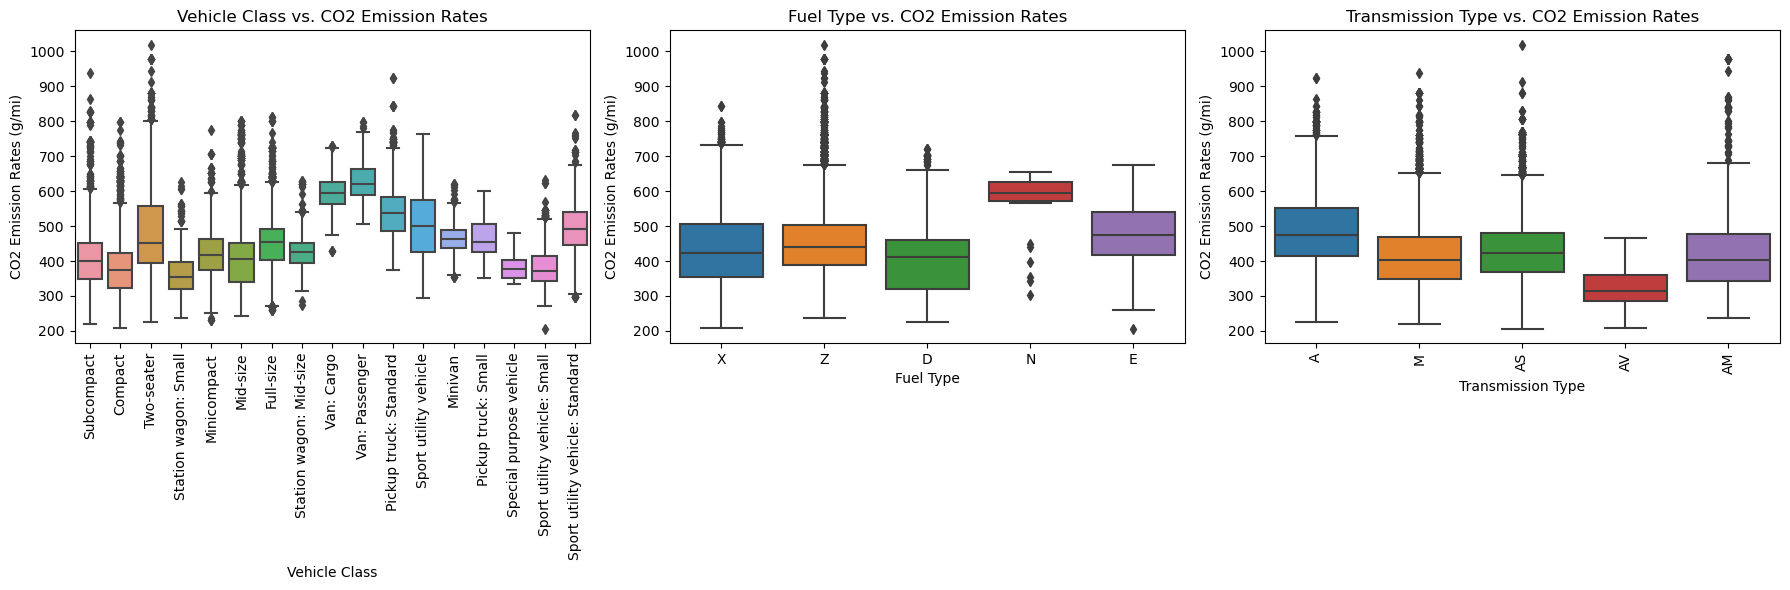

In [202]:
# Boxplots to compare categorical variables with CO2 emission rates

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Vehicle Class vs. CO2 Emission rates
sns.boxplot(x=cdf["Vehicle class"], y=cdf["CO2 emissions (g/mi)"], ax=axes[0])
axes[0].set_title("Vehicle Class vs. CO2 Emission Rates")
axes[0].set_xlabel("Vehicle Class")
axes[0].set_ylabel("CO2 Emission Rates (g/mi)")
axes[0].tick_params(axis='x', rotation=90)

# Fuel Type vs. CO2 Emission rates
sns.boxplot(x=cdf["Fuel type"], y=cdf["CO2 emissions (g/mi)"], ax=axes[1])
axes[1].set_title("Fuel Type vs. CO2 Emission Rates")
axes[1].set_xlabel("Fuel Type")
axes[1].set_ylabel("CO2 Emission Rates (g/mi)")

# Transmission Type vs. CO2 Emission rates
sns.boxplot(x=cdf["Transmission type"], y=cdf["CO2 emissions (g/mi)"], ax=axes[2])
axes[2].set_title("Transmission Type vs. CO2 Emission Rates")
axes[2].set_xlabel("Transmission Type")
axes[2].set_ylabel("CO2 Emission Rates (g/mi)")
axes[2].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

**Observations:**
- Vehicle Class vs. CO₂ Emission rates:
    - Larger vehicles (SUVs, pickups, vans) tend to have higher median rates.
    - Smaller cars (Compact and subcompact) show lower emission rates.
    - Two-seaters show wide variance, likely due to performance/sports cars being mixed with economy models.
- Fuel Type vs. CO₂ Emission rates:
    - Natural Gas (N) vehicles have higher rates.
    - Diesel (D) vehicles generally have lower emission rates than the available alternatives- likely due to higher fuel efficiency.
- Transmission Type vs. CO₂ Emission rates:
    - Automatic transmission (A) vehicles have the highest median.
    - Vehicles that have continuously variable transmissions (AV) have lower rates. As mentioned earlier, this transmission is generally found in hybrids and economy cars. So, the reason might be related to `Model class` rather than transmission type.

<h3>4.3. Multivariate Analysis</h3>
<h4>4.3.1. Numerical Features</h4>

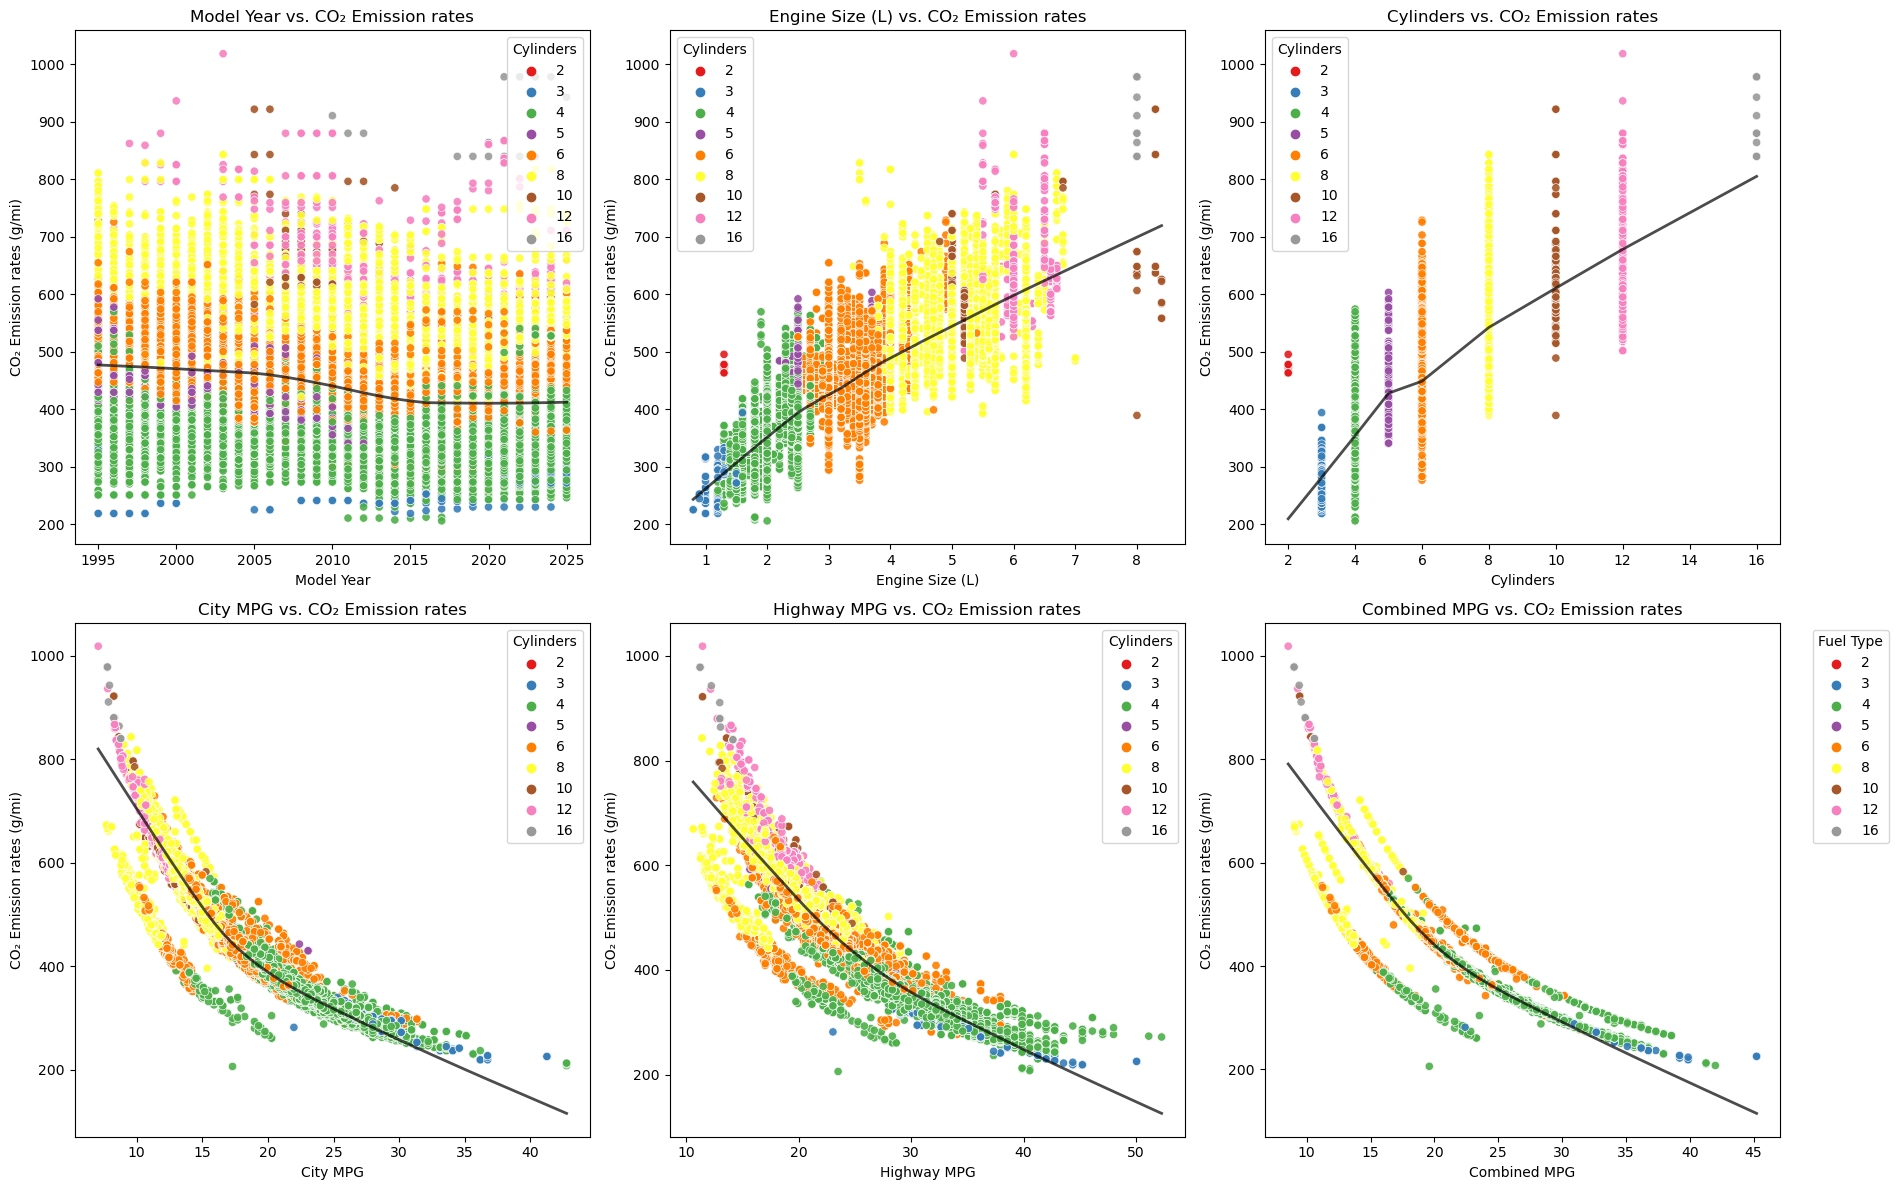

In [206]:
# Feature and label pairs for plots
features = [
    ("Model year", "Model Year"),
    ("Engine size (L)", "Engine Size (L)"),
    ("Cylinders", "Cylinders"),
    ("City (mpg)", "City MPG"),
    ("Highway (mpg)", "Highway MPG"),
    ("Combined (mpg)", "Combined MPG")
]

# Create a 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Common settings for scatter plots
scatter_kws = {'alpha': 0.9, 'marker': 'o'}
palette = 'Set1'  # Color palette for Cylinders

# Loop through each feature and create scatter plots with hue for Cylinders
for ax, (feature, label) in zip(axes.flat, features):
    sns.scatterplot(
        x=cdf[feature], 
        y=cdf["CO2 emissions (g/mi)"], 
        hue=cdf["Cylinders"], 
        palette=palette,
        ax=ax,
        **scatter_kws
    )
    
    # Regression Line to Show Trend
    sns.regplot(
        x=cdf[feature], 
        y=cdf["CO2 emissions (g/mi)"], 
        scatter=False, 
        lowess=True, 
        ax=ax, 
        color="black", 
        line_kws={'lw': 2, 'alpha': 0.7} 
    )

    ax.set_title(f"{label} vs. CO₂ Emission rates")
    ax.set_xlabel(label)
    ax.set_ylabel("CO₂ Emission rates (g/mi)")

# Adjust layout and legend position for better spacing
plt.tight_layout()
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Observations:** Beside the points covered in bivariate analysis, we observe:
- Interaction Between Cylinders, Engine Size, and CO₂ Emission Rates:
    - Higher-cylinder vehicles tend to have larger engines, which strongly correlates with higher rates.
    - The Engine Size vs. CO₂ Emission rates plot shows a nonlinear trend, where emission rates increase significantly for larger engines.
- Fuel Efficiency and CO₂ Emission Rates Are Nonlinearly Related:
    - City, Highway, and Combined MPG vs. CO₂ Emission rates show a strong inverse relationship, but the curves are not linear.
    - Higher-cylinder vehicles (e.g., 8, 10, 12) cluster at lower MPG and higher CO₂ emission rates, suggesting a compounding effect.
- Model Year and CO₂ Emission Rates Show a Complex Trend:
    - While CO₂ emission rates decrease over time, the trend is not strictly linear.
    - Newer vehicles generally emit less CO₂, but higher-cylinder models remain emission-intensive, regardless of model year.

<h4>4.3.2. Categorical Features</h4>

Let's now check the relationship between categorical variables and CO₂ emission rates.

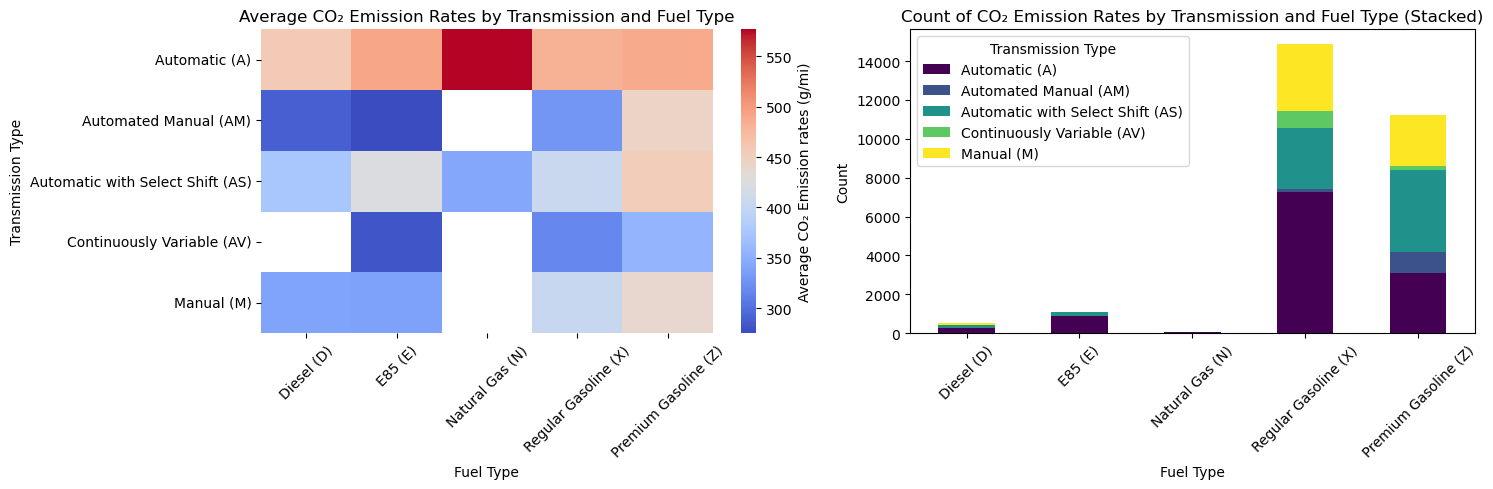

In [213]:
# Pivot table for Average CO2 Emission rates (Mean)
pivot_avg_co2 = pd.pivot_table(cdf, 
                               values='CO2 emissions (g/mi)', 
                               index='Transmission type', 
                               columns='Fuel type', 
                               aggfunc='mean')

pivot_count_co2 = pd.pivot_table(cdf, 
                               values='CO2 emissions (g/mi)', 
                               index='Fuel type', 
                               columns='Transmission type', 
                               aggfunc='count')

# Replace labels in both pivot tables with descriptive names for better visualization
pivot_avg_co2.index = pivot_avg_co2.index.map(transmission_labels)
pivot_avg_co2.columns = pivot_avg_co2.columns.map(fuel_type_labels)

pivot_count_co2.index = pivot_count_co2.index.map(fuel_type_labels)
pivot_count_co2.columns = pivot_count_co2.columns.map(transmission_labels)

# Create a 1x2 subplot layout
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Heatmap for Average CO2 Emission rates
sns.heatmap(pivot_avg_co2, 
            annot=False, 
            fmt='.0f', 
            cmap='coolwarm', 
            ax=ax[0],  # Plot on the first subplot
            cbar_kws={'label': 'Average CO₂ Emission rates (g/mi)'})
ax[0].set_title('Average CO₂ Emission Rates by Transmission and Fuel Type')
ax[0].set_xlabel('Fuel Type')
ax[0].set_ylabel('Transmission Type')
ax[0].tick_params(axis='x', rotation=45)


# Plot 2: Stacked Bar Plot for Count of CO2 Emission rates
pivot_count_co2.plot(kind='bar', 
                                stacked=True, 
                                colormap='viridis', 
                                ax=ax[1])  # Plot on the second subplot
ax[1].set_title('Count of CO₂ Emission Rates by Transmission and Fuel Type (Stacked)')
ax[1].set_xlabel('Fuel Type')
ax[1].set_ylabel('Count')
ax[1].legend(title='Transmission Type')
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout and show the combined plot
plt.tight_layout()
plt.show()

**Observations:**
- **High Interactivity:** Transmission and Fuel Type show high interactions. For instance:
  - Natural Gas (N) vehicles with Automatic (A) gears show the highest emissions, while natural gas cars with Automatic with Select Shift (AS) show much lower emissions. This, however, could be due to small number of records (right figure) and other contributing factors like `Vehicle Class`.
  - Similarly, emissions of cars that use Regular Gasoline (X) vary significantly depending on the transmission type.
- **Transmission Type Distribution:**
  - Dominance of Automatic (A) and Automatic with Select Shift (AS) across most fuel types.
  - Manual (M) transmissions are mainly associated with Regular Gasoline (X) and Premium Gasoline (Z), likely reflecting sport-oriented models.
- **Correlation Insight:**
  - Strong association between Diesel (D) and Automatic transmissions (right plot).
  - E85 (E) and Natural Gas (N) are limited and mostly paired with Automatic (A).
- **Missing Combinations:** Certain Transmission and Fuel Type pairs are absent (e.g., Diesel & Natural Gas), indicating dependency between the two categorical variables.
- **Skewed Distribution:** Highly skewed distribution for Regular Gasoline (X) and Premium Gasoline (Z), suggesting the need for stratified cross-validation.

**Modeling Implications:**
- **Feature Selection:**
  - Include both **Fuel Type** and **Transmission Type** as categorical variables.
  - Capture their interactions using:
    - **One-Hot Encoding** or **Target Encoding**.
    - Explicit interaction terms (`Fuel Type x Transmission Type`) if using linear models.
- **Model Selection:**
  - **Tree-based models** (Random Forest, Gradient Boosting) to capture complex interactions and dependencies.
  - **Polynomial Ridge Regression** if including explicit interaction terms.

Let's check another plot.

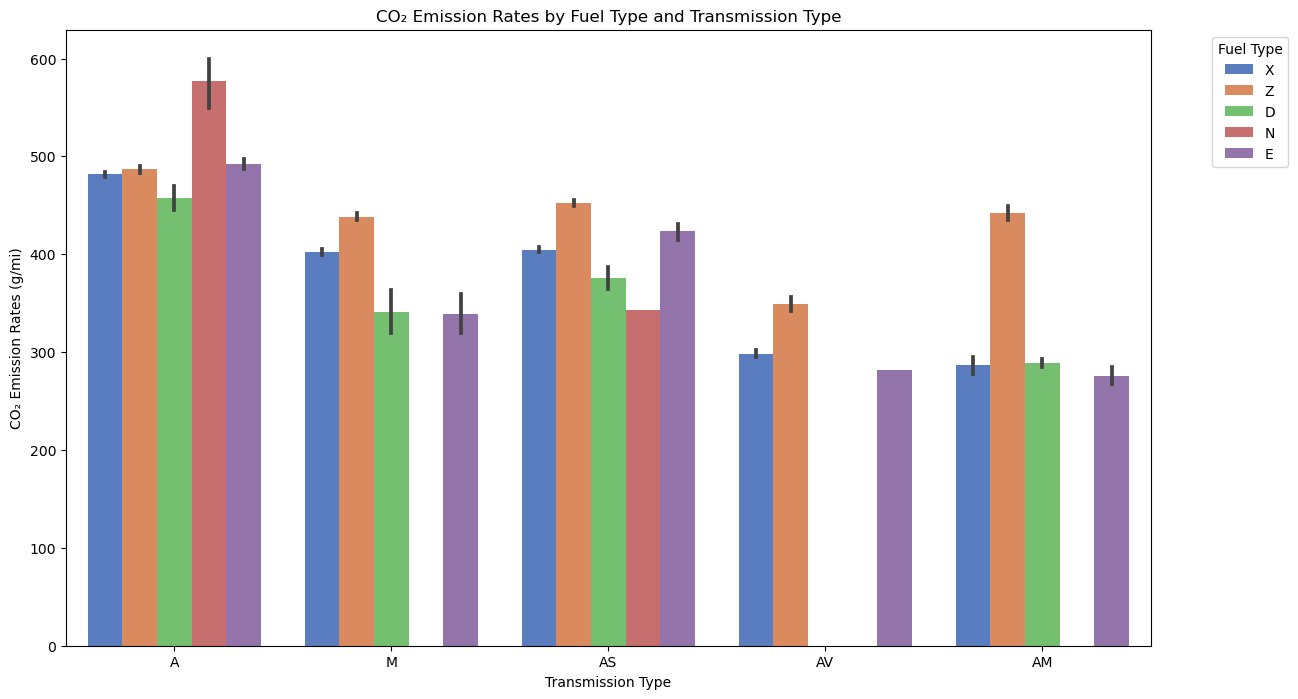

In [219]:
# Grouped Bar Plot for CO2 Emission rates by Fuel Type and Transmission Type
plt.figure(figsize=(14, 8))
sns.barplot(x='Transmission type', y='CO2 emissions (g/mi)', hue='Fuel type', data=cdf_prepared, palette='muted')
plt.title('CO₂ Emission Rates by Fuel Type and Transmission Type')
plt.ylabel('CO₂ Emission Rates (g/mi)')
plt.xlabel('Transmission Type')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Observations:**
- Interactions: Varying relative positions of each fuel type within and between groups (`Transmission Types`) suggest non-linear interactions between these variables, which need to be captured for predicting `CO2 emissions (g/mi)` accurately. For instance:
    - **Natural Gas (N)** is associated with the highest emission for **Automatic (A)** transmission and the lowest emission for **Automatic with Select Shift (AS)**.
    - **Diesel (D)** vehicles with **Automatic (A)** transmission emit 1.5x more CO₂ than those with **Automated Manual (AM)** transmission.
- Modeling implications: 
    - Use one-hot encoding for `Fuel Type` and `Transmission Type` to capture category-specific impacts.
    - Use advanced modeling (Ridge, Polynomial, Random Forest) to handle interactions.

I visualized the relationship between key numerical features with emissions in 4.2.1. Let's now add a categorical variable to see what further insights we can find.

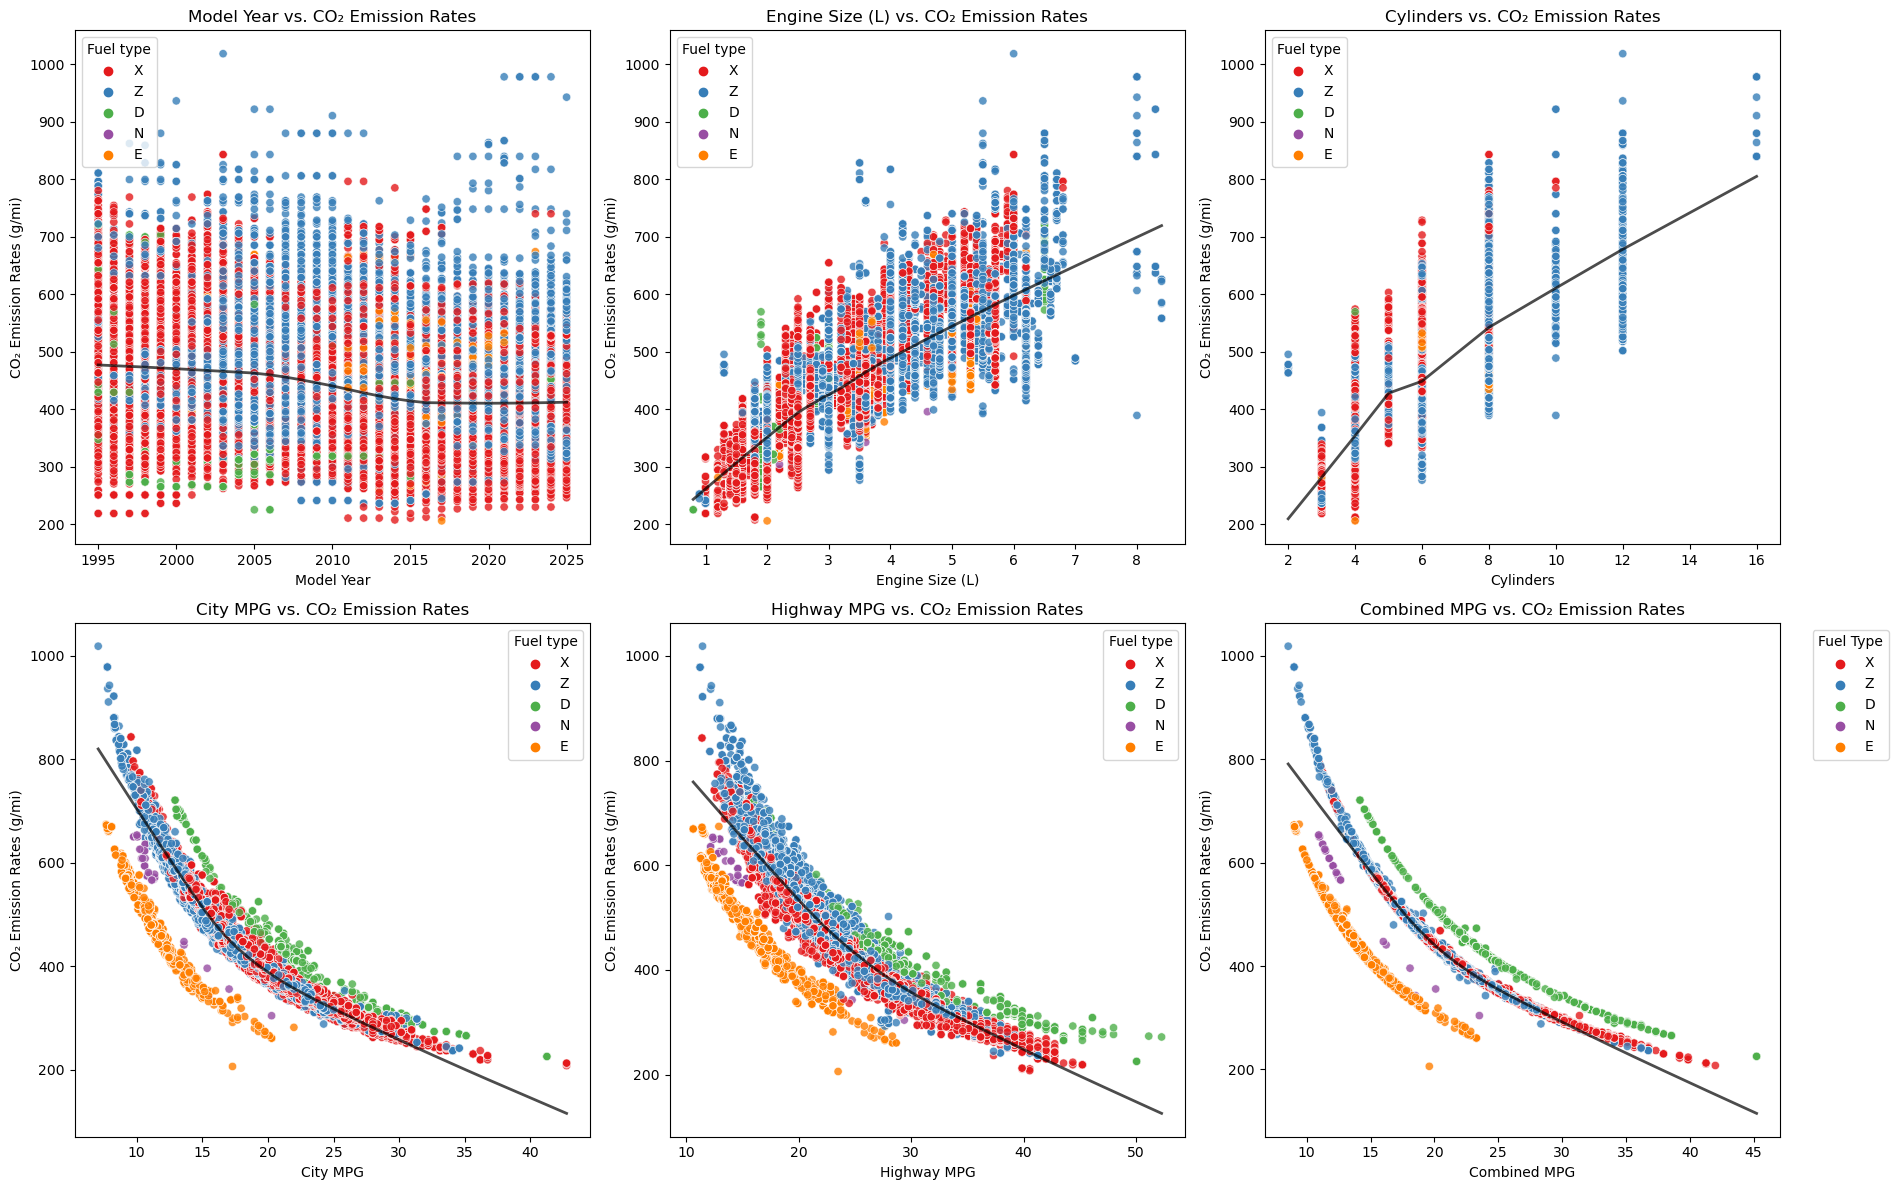

In [225]:
# Feature and label pairs for plots
features = [
    ("Model year", "Model Year"),
    ("Engine size (L)", "Engine Size (L)"),
    ("Cylinders", "Cylinders"),
    ("City (mpg)", "City MPG"),
    ("Highway (mpg)", "Highway MPG"),
    ("Combined (mpg)", "Combined MPG")
]

# Create a 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Common settings for scatter plots
scatter_kws = {'alpha': 0.8, 'marker': 'o'}  # Circular markers with some transparency
palette = 'Set1'  # Color palette for Fuel Type

# Loop through each feature and create scatter plots with hue for Fuel Type
for ax, (feature, label) in zip(axes.flat, features):
    sns.scatterplot(
        x=cdf[feature], 
        y=cdf["CO2 emissions (g/mi)"], 
        hue=cdf["Fuel type"], 
        palette=palette,
        ax=ax,
        **scatter_kws
    )
    # Regression Line to Show Trend
    sns.regplot(
        x=cdf[feature], 
        y=cdf["CO2 emissions (g/mi)"], 
        scatter=False, 
        lowess=True, 
        ax=ax, 
        color="black", 
        line_kws={'lw': 2, 'alpha': 0.7}
    )
    
    ax.set_title(f"{label} vs. CO₂ Emission Rates")
    ax.set_xlabel(label)
    ax.set_ylabel("CO₂ Emission Rates (g/mi)")

# Adjust layout and legend position for better spacing
plt.tight_layout()
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Observations:** Beside the points covered in bivariate analysis, we observe:
- `Fuel Type` provides further differentiation power to predict CO₂ emission rates. This is best illustrated in the last plot where emission rates for different fuel types form distinct groupings.

These and previous observations suggest:
- Including categorical variables `Fuel type` and `Transmission type`, using one-hot encoding.
- Using Ridge or Lasso Regression regularization instead of standard regression techniques to handle multicollinearity while maintaining predictive power (e.g., engine and cylander sizes, consumptions if more than one is selected).
- Using Polynomial transformation to capture non-linearities (e.g., Consumptions vs. emissions, Engine size (L)²)
- Using Random Forests or Gradient Boosting to handle correlated features and capture non-linear interactions (e.g., Number of gears-speeds and consumption (mpg) metrics).

To sum up, the EDA helped to gain a more in-depth understanding of the data. For instance:
- Feature Selection: the strength of correlations and collinearity between features
- Machine Learning Methods: since there are collinearities among features and distributions are skewed, certain models are off the table.

These will guide us in developing a robust model that provide accurate predictions. 
It's time to move to the modeling section of this analysis.

<h2 style="
    background-color: #064E3B; 
    color: #A7F3D0; 
    padding: 15px; 
    border-radius: 5px;
    font-size: 28px;
    margin-top: 20px;
">
    5. Machine Learning Modeling
    <a class="anchor" id="mlm" style="margin: 10;"></a>
</h2>

In this section, I will develop predictive models to estimate **use-phase CO₂ emission rates** for newly manufactured vehicles. The objective is to compare multiple algorithms to find the most accurate and reliable model. 

The workflow follows these steps:
1. **Data Preparation**: Selecting relevant features and encoding categorical variables.
2. **Train-Test Split**: Splitting the dataset to evaluate model performance and generalization.
3. **Baseline Model (Ridge Regression)**: Establishing a baseline using a linear model with regularization.
4. **Polynomial Ridge Regression**: Enhancing the model by capturing non-linear relationships.
5. **Random Forest Model**: Using an ensemble approach to capture complex interactions.
6. **Model Comparison and Evaluation**: Evaluating models using cross-validation and residual analysis.
7. **Deployment Preparation**: Exporting the best model for a **Streamlit** application.

First, let's import the `Sikit` libraries that will be used for this analysis.

In [231]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

print("Done!")

Done!


<h3>5.1. Data Preparation: Feature Selection & Encoding</h3> 

To build effective predictive models, I will first select relevant features that significantly influence CO₂ emission rates. Let's first take a look at the first 5 rows of data.

In [234]:
cdf.head()

Model year   Make       Model Vehicle class  Engine size (L)  Cylinders  \
0        1995  Acura     Integra    Subcompact              1.8          4   
1        1995    BMW  318i/318is    Subcompact              1.8          4   
2        1995    BMW        320i    Subcompact              2.0          6   
3        1995    BMW  325i/325is    Subcompact              2.5          6   
4        1995    BMW       840ci    Subcompact              4.0          8   

  Transmission type  Number of gears-speeds Fuel type  City (mpg)  \
0                 A                     4.0         X       20.28   
1                 A                     4.0         Z       18.38   
2                 A                     5.0         Z       17.69   
3                 A                     4.0         Z       17.55   
4                 A                     5.0         Z       14.61   

   Highway (mpg)  Combined (mpg)  CO2 emissions (g/mi)  
0          28.34           23.29                373.37  
1          26.14           21.19                410.38  
2          26.14           20.63                421.65  
3          25.29           20.45                426.48  
4          21.58           17.17                506.94

Upon previous analysis and several rounds of initial ML modeling, I came to the conclusion that the bellow selection of variables balances the complexity and accuracy of the results well. For instance:
- `combined (mpg)` highly correlates with `City (mpg)` and `Highway (mpg)`. Removing the component and only keeping the combined value decreases accuracy, but adding it will add no more accuracy and make the model more complex.
- 'Make` and `Model' bring too much complexity, so I dropped them. 

In [237]:
# Selecting relevant numerical and categorical features
numerical_features = ["Model year", "Engine size (L)", "Cylinders", "Number of gears-speeds", "City (mpg)", "Highway (mpg)"]
categorical_features = ["Transmission type", "Fuel type"]

# Dropping irrelevant columns (Make, Model as they introduce high cardinality)
df_selected = cdf[numerical_features + categorical_features + ["CO2 emissions (g/mi)"]].copy()

# Displaying the first few rows to verify the selection
df_selected.head()

Model year  Engine size (L)  Cylinders  Number of gears-speeds  City (mpg)  \
0        1995              1.8          4                     4.0       20.28   
1        1995              1.8          4                     4.0       18.38   
2        1995              2.0          6                     5.0       17.69   
3        1995              2.5          6                     4.0       17.55   
4        1995              4.0          8                     5.0       14.61   

   Highway (mpg) Transmission type Fuel type  CO2 emissions (g/mi)  
0          28.34                 A         X                373.37  
1          26.14                 A         Z                410.38  
2          26.14                 A         Z                421.65  
3          25.29                 A         Z                426.48  
4          21.58                 A         Z                506.94

Now, it's time to convert categorical variables into dummy variables using One-hot Encoding.

In [240]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df_selected, columns=categorical_features, drop_first=False)

# Identify new categorical columns (one-hot encoded ones)
encoded_categorical_cols = df_encoded.columns.difference(df_selected.columns)

# Convert only those columns to integers
df_encoded[encoded_categorical_cols] = df_encoded[encoded_categorical_cols].astype(int)

df_encoded.head()

Model year  Engine size (L)  Cylinders  Number of gears-speeds  City (mpg)  \
0        1995              1.8          4                     4.0       20.28   
1        1995              1.8          4                     4.0       18.38   
2        1995              2.0          6                     5.0       17.69   
3        1995              2.5          6                     4.0       17.55   
4        1995              4.0          8                     5.0       14.61   

   Highway (mpg)  CO2 emissions (g/mi)  Transmission type_A  \
0          28.34                373.37                    1   
1          26.14                410.38                    1   
2          26.14                421.65                    1   
3          25.29                426.48                    1   
4          21.58                506.94                    1   

   Transmission type_AM  Transmission type_AS  Transmission type_AV  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Transmission type_M  Fuel type_D  Fuel type_E  Fuel type_N  Fuel type_X  \
0                    0            0            0            0            1   
1                    0            0            0            0            0   
2                    0            0            0            0            0   
3                    0            0            0            0            0   
4                    0            0            0            0            0   

   Fuel type_Z  
0            0  
1            1  
2            1  
3            1  
4            1

In [244]:
df_encoded.to_csv("/Users/hasan/CO2/data/encoded_data.csv", index=False) # save the encoded data
print("encoded file saved successfully!")

encoded file saved successfully!


<h3>5.2. Train-Test Split</h3>

To evaluate model performance, I split the data into training and testing sets using an 80-20 ratio. A `random_state` of 42 is set to ensure reproducibility of results. This split allows the model to learn patterns from the training data while validating its generalization on unseen test data.

In [247]:
# Splitting dataset into features (X) and target (y)
X = df_encoded.drop(columns=["CO2 emissions (g/mi)"])
y = df_encoded["CO2 emissions (g/mi)"]

# Splitting into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Done!")

Done!


In [249]:
# Display the shape of the training and testing sets
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)

Training Set: (22193, 16) (22193,)
Testing Set: (5549, 16) (5549,)


<h3>5.3. Ridge Multiple Linear Regression Model</h3>

Ridge Regression is selected as the baseline model due to its ability to:
- **Handle Multicollinearity:** By applying L2 regularization, Ridge Regression reduces the impact of correlated features (e.g., `Engine Size (L)` v.s. `Cylinders` and `City (mpg)` v.s. `Highway (mpg)`). I use Ridge Regression (instead of standard linear regression) to deal with collinearity and prevent overfitting.
- **Improve Generalization:** The penalty term prevents overfitting by shrinking coefficients.

The objective is to establish a baseline for CO₂ emission rates predictions and compare it against more complex models. I will also perform hyperparameter tuning for the `alpha` parameter, which controls the strength of regularization.


Let's first standardize the features and then optimize the hypermarameter `alpha`.

In [252]:
# Standardize the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h4>5.3.1. Hyperparameter Optimization</h4>

I perform this procedure to find the best regularization strength (`alpha`) for the Ridge model, which balances model complexity and performance.

I use `GridSearchCV` with K-Fold Cross-Validation (`n_splits=5`) and `shuffle=True` since the data is not random and is ordered based on the `Model year` variable.

In [255]:
# Define hyperparameter grid for Ridge and Lasso Regression
param_grid = {
    "alpha": [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Define K-Fold Cross-Validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Ridge Regression Optimization
ridge = Ridge()
ridge_search = GridSearchCV(ridge, param_grid, scoring="r2", cv=kf, n_jobs=-1)
ridge_search.fit(X_train_scaled, y_train)

# Best parameters and scores
best_alpha_ridge = ridge_search.best_params_['alpha']
best_score_ridge = ridge_search.best_score_

print("Best Alpha:", best_alpha_ridge, 
      "\nBest Score:", best_score_ridge)

Best Alpha: 1 
Best Score: 0.9370266310317501


With the best `alpha` and promising score, let's train the model.

<h4>5.3.2. Model Training</h4>

Now, it's time to train a Ridge model With the best `alpha` and a promising score!

In [259]:
# Train a Ridge model with the best alpha values
best_ridge = Ridge(alpha=best_alpha_ridge).fit(X_train_scaled, y_train)

best_ridge_r2_train = best_ridge.score(X_train_scaled, y_train)

# Print results
print(f"R² on Training Set: {best_ridge_r2_train:.4f}")

R² on Training Set: 0.9371


<h4>5.3.3. Model Evaluation</h4>

Here, I evaluate the model using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R^2).

In [307]:
# Generate predictions on the test set
y_pred = best_ridge.predict(X_test_scaled)

best_ridge_r2_test = best_ridge.score(X_test_scaled, y_test)

# Print results
print(f"R² on Training Set: {best_ridge_r2_train:.4f}")
print(f"R² on Test Set: {best_ridge_r2_test:.4f}")

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Create DataFrames for clean table display
metrics = ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", 
           "Root Mean Squared Error (RMSE)", "R-Squared (R²)"]
ridge_values = [mae, mse, rmse, r2]

metrics_df = pd.DataFrame({"Metric": metrics, "Linear Ridge Regression": ridge_values})

#Display metrics dataframe
metrics_df

R² on Training Set: 0.9371
R² on Test Set: 0.9358


Metric  Linear Ridge Regression
0       Mean Absolute Error (MAE)                18.899650
1        Mean Squared Error (MSE)               697.797833
2  Root Mean Squared Error (RMSE)                26.415863
3                  R-Squared (R²)                 0.935804

**Model Evaluation Results:**
- On average, predictions are off by about 18.89 g/mi of CO₂ emission rates.
- The model explains 93.36% of the emission rates' variance in the unseen data.
- The test R² is very close to the training R² (~0.0013 difference).
- This means the model generalizes well to unseen data without significant overfitting.

<h4>5.3.4. Cross Validation</h4>

To evaluate the model's stability and generalization, I perform cross-validation using 5 folds. This approach provides a more robust estimate of the model's performance by averaging results over multiple splits. 
Let's see how the model perform in cross validation.

In [284]:
# Standardize the entire features for Cross Validation
X_scaled = scaler.transform(X)

# Perform Cross-Validation on the best Ridge model for the entire dataset
ridge_cv_scores = cross_val_score(best_ridge, X_scaled, y, cv=kf, scoring='r2')

# Compute mean and standard deviation of cross-validation scores
ridge_cv_mean = ridge_cv_scores.mean()
ridge_cv_std = ridge_cv_scores.std()


# Print results
print("R² per fold:", ridge_cv_scores)

# Create DataFrame for cross-validation results comparison
cv_comparison_df = pd.DataFrame({
    "Metric": ["Train Set R²", "Test Set R²", "Cross-Validation Mean R²", "Cross-Validation R² Std Dev"],
    "Linear Ridge Regression": [best_ridge_r2_train, best_ridge_r2_test, ridge_cv_mean, ridge_cv_std],
})

# Show results
cv_comparison_df

R² per fold: [0.935804   0.93909173 0.93606149 0.93735419 0.93554683]


Metric  Linear Ridge Regression
0                 Train Set R²                 0.937142
1                  Test Set R²                 0.935804
2     Cross-Validation Mean R²                 0.936772
3  Cross-Validation R² Std Dev                 0.001316

**Interpretation of Results:**

The Ridge Regression model’s evaluation results indicate strong performance and good generalization:

- Cross-Validation Mean R²: 0.9368
    - This shows that, on average, the model explains 93.68% of the variance in the data across cross-validation folds.
- Cross-Validation R² Standard Deviation: 0.0013
    - The low standard deviation indicates that the model performs consistently across different validation splits.
    - This means the model is stable and not overly sensitive to the choice of training data.

The main insights:
- Model Generalization is Strong: No significant drop from cross-validation to test performance.
- Low Variance Across Cross-Validation Splits: The model is robust and consistent.
- No Overfitting: If the test R² had been much lower, it would indicate overfitting, but here it is well-aligned with cross-validation.

**Key Takeaways:**
- **Strong Predictive Power:** The Linear Ridge model accurately captures relationships between features and CO₂ emission rates.  
- **Good Generalization:** The small gap between cross-validation and test R² scores suggests the model is **not overfitting**.  
- **Regularization Helps:** Ridge regression successfully prevents excessive reliance on individual features by applying a small penalty on large coefficients.  


Let's check the residuals.

<h4>5.3.5. Residual Analysis</h4>

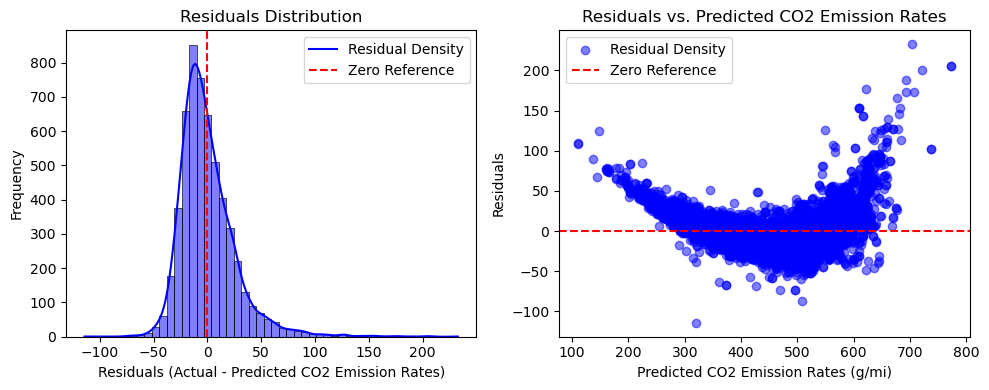

In [288]:
import warnings

# Suppress only the specific FutureWarning related to `mode.use_inf_as_na`
# This warning is being ignored because it does not indicate actual NaNs in the data or affect the analysis. 
# It is simply a deprecation notice for mode.use_inf_as_na, which will be removed in future Pandas versions. 
# Suppressing it helps keep the notebook clean without unnecessary warnings cluttering the output. 
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.")

# Calculate residuals
ridge_residuals = y_test - y_pred

# Create a side-by-side plot layout (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Adjust width for better spacing

# Plot 1: Residuals Distribution (Histogram)
sns.histplot(ridge_residuals, bins=50, kde=True, color='blue', ax=axes[0])
axes[0].set_xlabel("Residuals (Actual - Predicted CO2 Emission Rates)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Residuals Distribution")
axes[0].axvline(x=0, color='red', linestyle='dashed')
axes[0].legend(["Residual Density", "Zero Reference"])

# Plot 2: Residuals vs. Predicted Scatter Plot
axes[1].scatter(y_pred, ridge_residuals, alpha=0.5, color='blue')
axes[1].axhline(y=0, color='red', linestyle='dashed')
axes[1].set_xlabel("Predicted CO2 Emission Rates (g/mi)")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residuals vs. Predicted CO2 Emission Rates")
axes[1].legend(["Residual Density", "Zero Reference"])

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()

**Observations:**
- Residuals Distribution:
    - The residuals are approximately centered around zero, but the distribution is slightly skewed left, indicating that the model underestimates emissions for some vehicles. 
    - Additionally, the right tail suggests a few high-emission vehicles have large prediction errors.
- Residuals vs. Predicted CO2 Emission rates Scatter Plot:
    - The residuals show a U-shaped pattern, suggesting that the model systematically underestimates and overestimates CO₂ emission rates at lower and higher values. 
    - This indicates potential heteroscedasticity, meaning that prediction errors are not constant across all values, and transformations or non-linear modeling approaches might improve accuracy.
    
Let's now retrain the model on the entire dataset and visualize how the model performs.

<h4>5.3.6. Overall Performance: Retrained Model</h4>

After completing all evaluations, including **cross-validation and test set performance**, it is a good practice to **retrain the model using the entire dataset**. This ensures that the model benefits from all available data, leading to the most robust final model.

In this step, we:
- **Retrain** the Ridge regression model with the optimal `alpha` value.
- **Fit it on the entire dataset** to maximize learning from all available data.
- **Evaluate the final model** on the full dataset.
- **Use the model for predictions** on the available features- if it turned out to be the best model.

Below is the implementation of this final retraining step.

In [292]:
# ReTrain a Ridge model with the best alpha values and the entire dataset
best_ridge_rt = Ridge(alpha=best_alpha_ridge).fit(X_scaled, y)

best_ridge_rt_r2 = best_ridge_rt.score(X_scaled, y)

# Print results
print(f"R² on the Entire Set: {best_ridge_rt_r2:.4f}")

# Predict using the retrained Ridge model
predicted_MRR = best_ridge.predict(X_scaled)

# Define actual values
actual = y

R² on the Entire Set: 0.9369


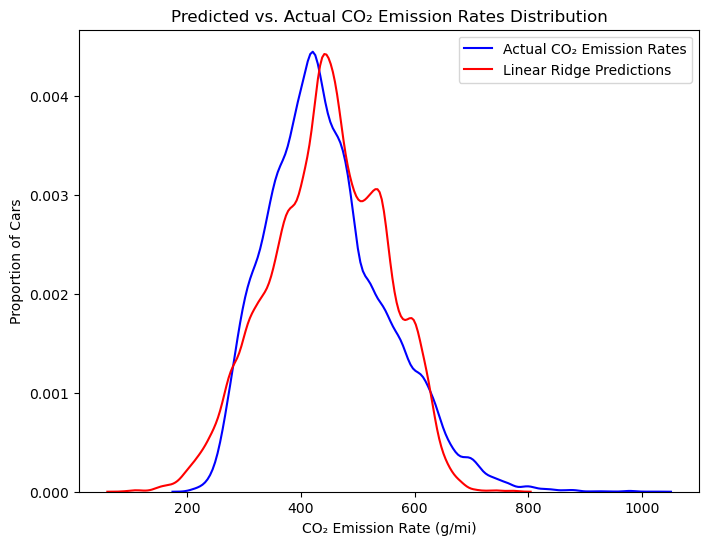

In [294]:
# Define plot size
plt.figure(figsize=(8, 6))

# KDE plots for two distributions
ax = sns.kdeplot(actual, color="b", label="Actual CO₂ Emission Rates", bw_adjust=0.8)   # Blue Line - Actual Values
sns.kdeplot(predicted_MRR, color="r", label="Linear Ridge Predictions", ax=ax, bw_adjust=0.8)  # Red Line - Ridge Regression Predictions

# Add title and labels
plt.title("Predicted vs. Actual CO₂ Emission Rates Distribution")
plt.xlabel("CO₂ Emission Rate (g/mi)")
plt.ylabel("Proportion of Cars")

# Add legend
plt.legend()

# Show plot
plt.show()

**Observations:**
- The two curves are close, indicating strong overall model performance. However, the predicted distribution appears slightly left-shifted, suggesting a tendency to underpredict CO₂ emission rates for higher-emission vehicles.
- Deviations at the tail ends:
    - The model overestimates emissions for very efficient vehicles and underestimates emissions for high-emission vehicles. 
    - This suggests a possible bias in handling extreme values, particularly in high-performance or heavy-duty vehicles.
    - Additionally, the right tail appears compressed, indicating that Ridge Regression may be regularizing too aggressively for high-emission predictions.

Ridge Regression serves as an effective baseline, capturing most of the variance in CO₂ emissions. However, its tendency to compress high-emission predictions suggests the need for a more flexible model. Possible improvements include Polynomial Ridge for capturing nonlinear effects, interaction terms, or methods like Random Forest to improve tail-end predictions. Let’s now explore Polynomial modeling.

<h3>5.4. Polynomial Ridge Regression Model</h3>

After establishing a baseline with **Ridge Regression**, I now explore **Polynomial Ridge Regression** to capture non-linear relationships between features and CO₂ emissions. By expanding the feature space using polynomial transformations, the model can learn complex interactions.

The general form of a **second-degree polynomial regression** is:
$$
y = \beta_0 + \sum_{i=1}^{n} \beta_i x_i + \sum_{i=1}^{n} \sum_{j=i}^{n} \beta_{ij} x_i x_j + \sum_{i=1}^{n} \beta_{ii} x_i^2
$$
where:  
- $y$ represents dependent variabl (e.g., `CO2 emissions (g/mi)`),
- $x_i$ represents input features (e.g., `Model year`, `Highway (mpg)`, `Fuel type_Z`),
- $\beta_0$ is the intercept (bias),
- $\beta_i$ are linear coefficients,
- $\beta_{ij}$ are interaction coefficients for polynomial terms,
- $\beta_{ii}$ are quadratic coefficients for polynomial terms.


This allows the model to learn more complex patterns that a simple linear model might miss. 

Here, I will focus on developing a second-degree polynomial ridge with hyperparameter optimization. I also checked 3rd-degree polynomial ridge (whitout hyperparameterization), which performs slightly better (+0.003 R^2) than 2nd-degree. Nonetheless, I decided to select 2nd-degree polynomials to balance complexity and risking overfitting.


<h4>5.4.1. Hyperparameter Optimization</h4>

In [299]:
# Polynomial feature transformation (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Hyperparameter tuning for Ridge Regression
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Regularization strength
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf, scoring="r2")
ridge_cv.fit(X_train_poly, y_train)

# Get the best alpha
best_alpha_poly = ridge_cv.best_params_['alpha']
best_score_poly = ridge_cv.best_score_

print("Best Alpha:", best_alpha_poly, 
      "\nBest Score:", best_score_poly)

Best Alpha: 0.1 
Best Score: 0.9948838176714189


<h4>5.4.2. Model Training</h4>

Now that the best parameter is determined, I train the model using the `make_pipeline()` function that simplifies the process. Since I observed collinearity, I first apply polynomial transformation and then scale the data.

In [302]:
# Define Pipeline (Correct Order: Polynomial → Scaling → Ridge)
ridge_poly = make_pipeline(poly, StandardScaler(), Ridge(alpha=best_alpha_poly))

# Train the model
ridge_poly.fit(X_train, y_train)

# Evaluate model performance on train set
ridge_poly_r2_train = ridge_poly.score(X_train, y_train)

# Print results
print(f"R² on Training Set: {ridge_poly_r2_train:.4f}")

R² on Training Set: 0.9950


<h4>5.4.3. Model Evaluation</h4> 

In [309]:
# Evaluate model performance on test set
ridge_poly_r2_test = ridge_poly.score(X_test, y_test)

# Print train and test results
print(f"R² on Training Set: {ridge_poly_r2_train:.4f}")
print(f"R² on Test Set: {ridge_poly_r2_test:.4f}")

# Generate predictions on the test set using Polynomial Ridge Regression
y_pred_poly = ridge_poly.predict(X_test)

# Compute evaluation metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

poly_values = [mae_poly, mse_poly, rmse_poly, r2_poly]

# Add polynomial to the metric DataFrames for Comparison
metrics_df["Polynomial Ridge Regression"] = poly_values

metrics_df

R² on Training Set: 0.9950
R² on Test Set: 0.9947


Metric  Linear Ridge Regression  \
0       Mean Absolute Error (MAE)                18.899650   
1        Mean Squared Error (MSE)               697.797833   
2  Root Mean Squared Error (RMSE)                26.415863   
3                  R-Squared (R²)                 0.935804   

   Polynomial Ridge Regression  
0                     4.802770  
1                    57.081308  
2                     7.555217  
3                     0.994749

**Observations:**
- MAE: The polynomial model has significantly lower average absolute error, meaning its predictions are much closer to actual values.
- MSE: The squared error is drastically lower in the polynomial model, indicating much less variance in prediction errors. The large drop in MSE shows how the first model struggled with nonlinear effects, while polynomial model handles them well.
- RMSE: The polynomial model reduces large errors significantly, showing better accuracy in capturing real CO₂ emission rates.
- R-Squared (R²): The polynomial model explains 99.47% of the variance, which is extremely high, suggesting a near-perfect fit.

So far, the polynomial Ridge Regression (Degree 2) is clearly superior to the previous model in all aspects! Let's check cross validation results.

<h4>5.4.4. Cross Validation</h4>

In [313]:
# Perform Cross-Validation on the Polynomial Ridge model
ridge_poly_cv_scores = cross_val_score(ridge_poly, X_train, y_train, scoring="r2", cv=5)

# Compute mean and standard deviation of cross-validation scores
ridge_poly_cv_mean = ridge_poly_cv_scores.mean()
ridge_poly_cv_std = ridge_poly_cv_scores.std()

# Evaluate on test set
ridge_poly_test_r2 = ridge_poly.score(X_test, y_test)

print("R² per fold:", ridge_poly_cv_scores)

# Create DataFrame for cross-validation results comparison
poly_cv_values = [ridge_poly_r2_train, ridge_poly_r2_test, ridge_poly_cv_mean, ridge_poly_cv_std]
cv_comparison_df["Polynomial Ridge Regression"] = poly_cv_values

# Show results
cv_comparison_df

R² per fold: [0.99488157 0.99512486 0.99435995 0.99337816 0.99494255]


Metric  Linear Ridge Regression  \
0                 Train Set R²                 0.937142   
1                  Test Set R²                 0.935804   
2     Cross-Validation Mean R²                 0.936772   
3  Cross-Validation R² Std Dev                 0.001316   

   Polynomial Ridge Regression  
0                     0.995023  
1                     0.994749  
2                     0.994537  
3                     0.000633

**Interpretation:**
- Cross-Validation Mean R²: The polynomial ridge model explains a significantly higher proportion of variance in the data, meaning it captures more complex relationships compared to linear ridge regression model.
- Cross-Validation R² Std Dev: The polynomial model is more stable, with much lower variation across different validation folds. This suggests it generalizes well during cross-validation.
- Test Set R²: The polynomial ridge model generalizes better to unseen test data, reinforcing its effectiveness.

Overall, the Polynomial Ridge outperforms standard Ridge Regression in all measures.

No overfitting was detected as training, cross-validation, and test scores are all very close.The polynomial model performs exceptionally well, but we should also check residuals.

<h4>5.4.5. Residual Analysis</h4> 

Residuals help identify patterns missed by the model, potential overfitting, or heteroscedasticity. Visualizing residuals provides insights into the model's error distribution.
Let's check the polynomial model's residuals and compare it with the first model.

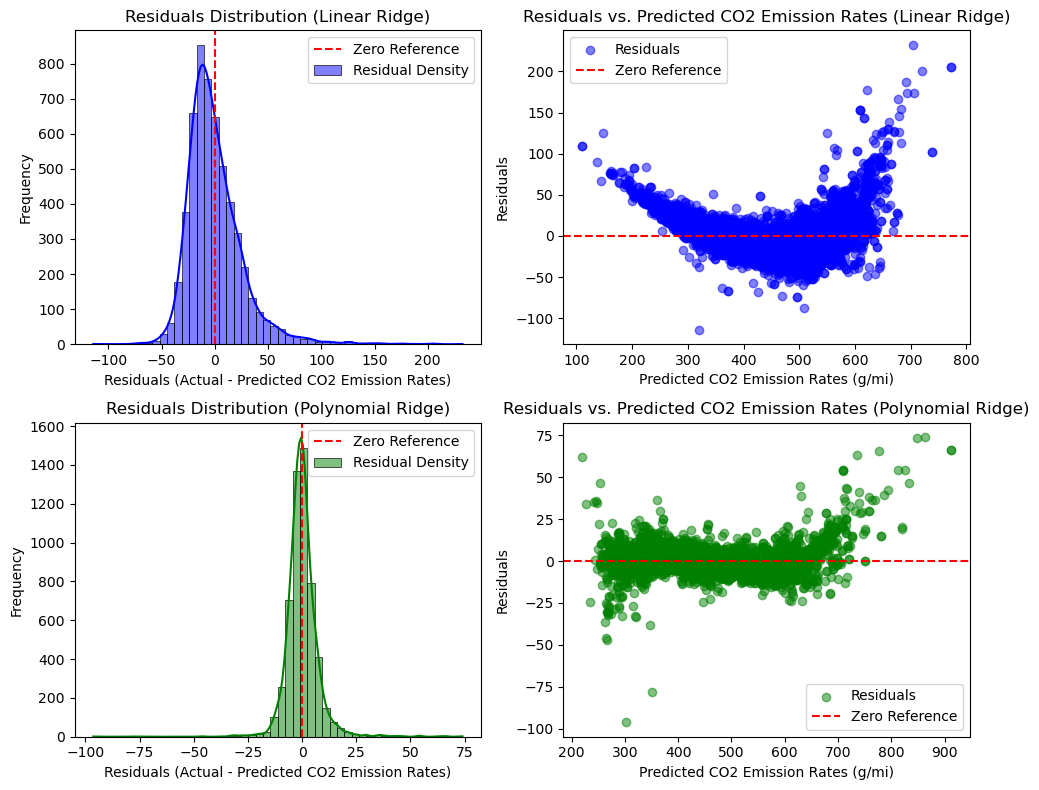

In [319]:
# Calculate residuals
ridge_poly_residuals = y_test - y_pred_poly

# Predictions and Residuals for Both Models
preds = [y_pred, y_pred_poly]
residuals = [ridge_residuals, ridge_poly_residuals]
titles = ["Linear Ridge", "Polynomial Ridge"]
colors = ["blue", "green"]

# Create a 2x2 Plot Layout
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Loop through Models for Consistent Plotting
for i in range(2):
    # Residuals Distribution (Histogram)
    sns.histplot(residuals[i], bins=50, kde=True, color=colors[i], ax=axes[i, 0], label="Residual Density")
    axes[i, 0].axvline(x=0, color='red', linestyle='dashed', label="Zero Reference")
    axes[i, 0].set_xlabel("Residuals (Actual - Predicted CO2 Emission Rates)")
    axes[i, 0].set_ylabel("Frequency")
    axes[i, 0].set_title(f"Residuals Distribution ({titles[i]})")
    axes[i, 0].legend()
    
    # Residuals vs. Predicted Scatter Plot
    axes[i, 1].scatter(preds[i], residuals[i], alpha=0.5, color=colors[i], label="Residuals")
    axes[i, 1].axhline(y=0, color='red', linestyle='dashed', label="Zero Reference")
    axes[i, 1].set_xlabel("Predicted CO2 Emission Rates (g/mi)")
    axes[i, 1].set_ylabel("Residuals")
    axes[i, 1].set_title(f"Residuals vs. Predicted CO2 Emission Rates ({titles[i]})")
    axes[i, 1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()

**Observations:**
- **Polynomial Ridge: Residuals Analysis:**
    - Residuals Distribution (Bottom Left):
      - Nearly normal and centered around zero, indicating an unbiased model.
      - Tight spread (-20 to 20 g/mi) suggests lower error variance.
      - Few extreme residuals exist, but they are infrequent.
    - Residuals vs. Predicted CO₂ Emission Rates (Bottom Right):
      - Residuals are evenly spread, showing no strong heteroscedasticity.
      - Some underestimation at higher emissions (~700+ g/mi).
      - No systematic bias, indicating robust generalization.
- **Comparison with Linear Ridge:**
    - Residuals Distribution (Top Left vs. Bottom Left):
      - Linear Ridge has a wider, right-skewed spread, indicating systematic errors.
      - Polynomial Ridge has a tighter, more symmetric distribution with reduced variance.
      - **Winner:** Polynomial Ridge.
    - Residuals vs. Predictions (Top Right vs. Bottom Right):
      - Linear Ridge shows a U-shaped pattern, missing non-linearity.
      - Polynomial Ridge removes curvature, improving fit and reducing extreme errors.
      - **Winner:** Polynomial Ridge.

**Polynomial Ridge is the better model.** It significantly improves accuracy by reducing error variance and capturing non-linearity. While overfitting is a potential risk, no major issues appear based on residuals.

<h4>5.4.6. Overall Performance: Retrained Model</h4>

Now let's see how each model does with respect to the entire dataset.

In [323]:
# ReTrain the Polynomial Ridge model with the best alpha values and the entire dataset
ridge_poly_rt = make_pipeline(poly, StandardScaler(), Ridge(alpha=best_alpha_poly))
ridge_poly_rt.fit(X, y)

ridge_poly_rt_r2 = ridge_poly_rt.score(X, y)

# Print results
print(f"R² on the Entire Set: {ridge_poly_rt_r2:.4f}")

R² on the Entire Set: 0.9950


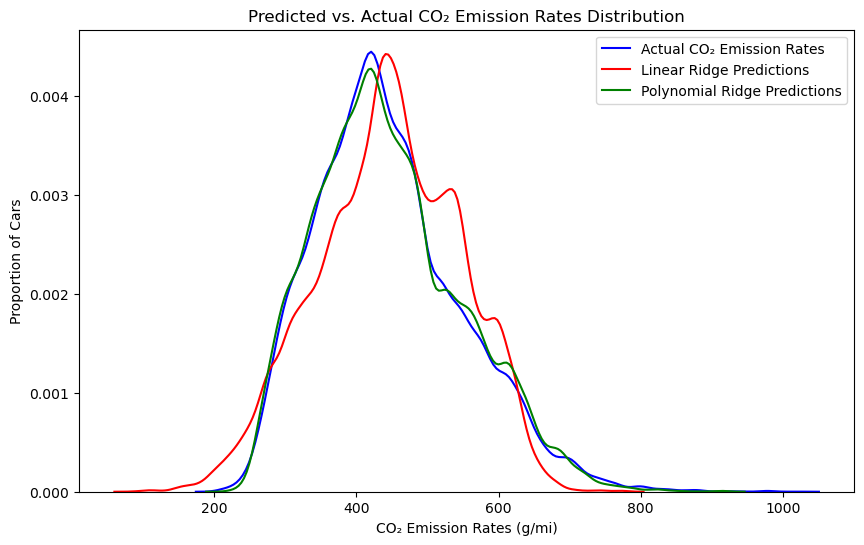

In [325]:
# Predict emissions for the entire dataset using the retrained Ridge model
predicted_poly = ridge_poly_rt.predict(X)

# Define plot size
plt.figure(figsize=(10, 6))

# KDE plots for three distributions
ax = sns.kdeplot(actual, color="b", label="Actual CO₂ Emission Rates", bw_adjust=0.8)   # Blue Line - Actual Values
sns.kdeplot(predicted_MRR, color="r", label="Linear Ridge Predictions", ax=ax, bw_adjust=0.8)  # Red Line - Ridge Regression Predictions
sns.kdeplot(predicted_poly, color="g", label="Polynomial Ridge Predictions", ax=ax, bw_adjust=0.8)  # Green Line - Polynomial Ridge Predictions

# Add title and labels
plt.title("Predicted vs. Actual CO₂ Emission Rates Distribution")
plt.xlabel("CO₂ Emission Rates (g/mi)")
plt.ylabel("Proportion of Cars")

# Add legend
plt.legend()

# Show plot
plt.show()

**Interpretation:**
- Ridge Regression (Red Line)
    - Captures the general trend but shows noticeable deviations.
    - Underestimates low CO₂ emission rates and overestimates rates near the peak.
    - Displays a **bias shift**, particularly in the **500–600 g/mi range**, where predictions are exaggerated.
    - Struggles to fully capture variations, indicating rigidity in handling emission rate complexities.
- Polynomial Ridge Regression (Green Line)
    - Closely follows the **actual distribution** (blue line), aligning well across emission ranges.
    - Reduces bias, particularly in peak and tail regions.
    - Smoothly adapts to emission variations, **better capturing non-linearity**.
    - Tail-end predictions are **less exaggerated** than the ridge model, indicating improved generalization.

The **Polynomial Ridge model clearly outperforms the Ridge model** in capturing CO₂ emission rates distribution. The 2nd-degree Polynomial Ridge Regression effectively captures complex non-linear interactions missed by the linear Ridge model. It reduces bias, aligns well with actual values, and generalizes better, especially for high-emission vehicles. 

After using this model to predict a series of hypothetical cars, However, I found out while the model performs very well overall, it consistently struggles with predicting cases at the boundaries of the features' value. This is also illustrated in the residual plots. So, I decided to look into other ML models that:
- Handle skewed data in presence of multicollinearity.
- Deals better with complexities, including due to combination of numerical and categorical features.

<h3>5.5. Random Forest Model</h3>

After exploring Polynomial Ridge Regression for non-linear relationships, I now investigate **Random Forest**, a method known for its robustness to multicollinearity and capability to model complex interactions between variables.

**Hyperparameter Optimization for Random Forest**

To maximize the model's predictive performance, I conduct hyperparameter optimization using `GridSearchCV`that automates the search for the best parameter combination.

The following parameters were tuned:
- **`n_estimators`**: Number of decision trees in the forest. Increasing this generally improves accuracy but requires more computation.
- **`max_depth`**: Maximum depth of each tree. Deeper trees capture complex patterns but may overfit.
- **`min_samples_split`**: Minimum number of samples required to split an internal node, controlling the model's complexity.

Due to the high computational cost, I narrowed down the grid search space to balance accuracy and efficiency. This approach ensures the model achieves optimal performance without overwhelming system resources.

<h4>5.5.1. Hyperparameter Optimization</h4>

In [331]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [20, 30],
    'min_samples_split': [2, 5]}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=kf, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and parameter
best_params = grid_search.best_params_
best_score_rf = grid_search.best_score_

print(f"Best Parameters for Random Forest: {best_params}")
print(f"Best Score: {best_score_ridge}")

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9370266310317501


The GridSearchCV successfully identified the best hyperparameters for the Random Forest model:
- max_depth = 20
- min_samples_split = 2
- n_estimators = 300

It's time for training the Random Forest model with the best parameters.

<h4>5.5.2. Model Training</h4>

In [335]:
# Define Random Forest Regressor
rf_model = RandomForestRegressor(**best_params, random_state=42)

#Train Random Forest Model
rf_model.fit(X_train, y_train)

rf_r2_train = rf_model.score(X_train, y_train)

# Print results
print(f"R² on Training Set: {rf_r2_train:.4f}")

R² on Training Set: 0.9999


<h4>5.5.3. Model Evaluation</h4> 

In [338]:
# Evaluate Random Forest Model
# Predict on test set using Random Forest
y_pred_rf = rf_model.predict(X_test)

rf_r2_test = rf_model.score(X_test, y_test)

# Print results
print(f"R² on Training Set: {rf_r2_train:.4f}")
print(f"R² on Test Set: {rf_r2_test:.4f}")

# Calculate Metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

rf_values = [mae_rf, mse_rf, rmse_rf, rf_r2_test]

# Add polynomial to the metric DataFrames for Comparison
metrics_df["Random Forest"] = rf_values

metrics_df

R² on Training Set: 0.9999
R² on Test Set: 0.9988


Metric  Linear Ridge Regression  \
0       Mean Absolute Error (MAE)                18.899650   
1        Mean Squared Error (MSE)               697.797833   
2  Root Mean Squared Error (RMSE)                26.415863   
3                  R-Squared (R²)                 0.935804   

   Polynomial Ridge Regression  Random Forest  
0                     4.802770       0.899402  
1                    57.081308      13.504821  
2                     7.555217       3.674891  
3                     0.994749       0.998758

<h4>5.5.4. Cross Validation</h4> 

In [341]:
# Cross-validation
rf_cv_scores = cross_val_score(rf_model, X, y, cv=kf, scoring="r2")

# Compute mean and standard deviation of cross-validation scores
rf_cv_mean = rf_cv_scores.mean()
rf_cv_std = rf_cv_scores.std()

# Print results
print("R² per fold:", rf_cv_scores)

# Create DataFrame for cross-validation results comparison
rf_cv_values = [rf_r2_train, rf_r2_test, rf_cv_mean, rf_cv_std]
cv_comparison_df["Random Forest"] = rf_cv_values

# Show results
cv_comparison_df

R² per fold: [0.99875435 0.99931018 0.9990982  0.99898891 0.99951585]


Metric  Linear Ridge Regression  \
0                 Train Set R²                 0.937142   
1                  Test Set R²                 0.935804   
2     Cross-Validation Mean R²                 0.936772   
3  Cross-Validation R² Std Dev                 0.001316   

   Polynomial Ridge Regression  Random Forest  
0                     0.995023       0.999898  
1                     0.994749       0.998758  
2                     0.994537       0.999133  
3                     0.000633       0.000262

The results show the Random Forest model outperform both previous model:
- Performance: Outstanding R² values near 1 on all sets (Train, Test, and CV), demonstrating excellent predictive power.
- Generalization: The lowest standard deviation (0.000262) indicates the highest stability and generalization.

Let's visualize this.

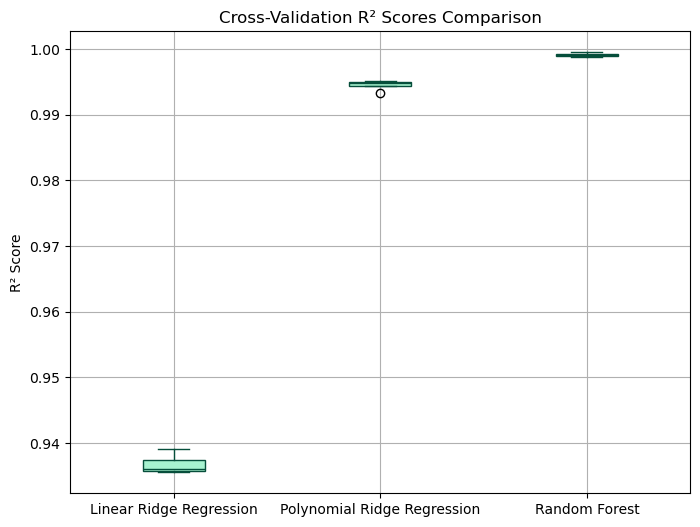

In [344]:
# Creating a list of all scores for plotting
all_scores = [ridge_cv_scores, ridge_poly_cv_scores, rf_cv_scores]
model_names = ['Linear Ridge Regression', 'Polynomial Ridge Regression', 'Random Forest']

# Visualizing Cross-Validation Scores for All Models
plt.figure(figsize=(8, 6))
plt.boxplot(all_scores, vert=True, patch_artist=True, 
            boxprops=dict(facecolor='#A7F3D0', color='#064E3B'),
            whiskerprops=dict(color='#064E3B'),
            capprops=dict(color='#064E3B'),
            medianprops=dict(color='#064E3B'),
            labels=model_names)
plt.title('Cross-Validation R² Scores Comparison')
plt.ylabel('R² Score')
plt.grid(True)
plt.show()

**Observations:**
- Overall Performance Comparison:
    - **Random Forest** achieves the **highest** mean **R² score**, indicating the best predictive accuracy.
    - Polynomial Ridge significantly improves over Ridge Regression, confirming its ability to capture non-linearity.
    - Ridge Regression has the **lowest** mean **R² score**, reinforcing that a purely linear approach is insufficient for this dataset.
- Model Variability and Stability:
    - Random Forest:
      - The most stable model with the smallest variance across cross-validation folds.
      - Achieves the **highest** overall **R² score**, demonstrating superior predictive accuracy.
      - Strong generalization with minimal overfitting.
    - Polynomial Ridge:
      - High and stable R² scores with minimal variance, demonstrating strong generalization.
      - Consistency suggests effective non-linear pattern learning.
    - Ridge Regression:
      - Very narrow boxplot, showing consistent but the **lowest** R² across folds.
      - Reliable but lacks the flexibility needed for complex relationships.

**Conclusions:**
- **Random Forest is the best-performing model**, capturing complex interactions and non-linear relationships effectively. I will use this model for app deployment.
- **Polynomial Ridge is a strong alternative**, offering high stability with minimal variance. It can be considered if interpretability is a priority, as it provides insights into non-linear interactions.
- **Ridge Regression remains a useful baseline**, illustrating the need for non-linear modeling.

<h4>5.5.5. Residual Analysis</h4> 

Let's check the Random Forest's residuals and compare it with the polynomial model.

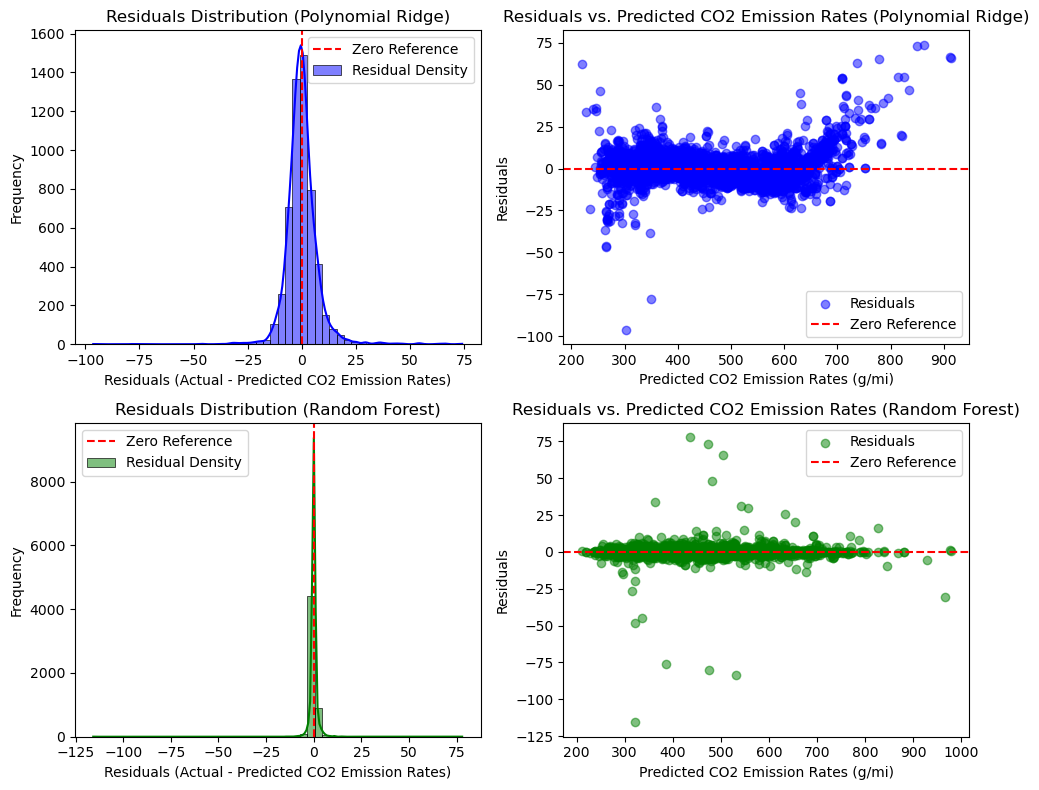

In [348]:
# Calculate residuals
rf_residuals = y_test - y_pred_rf

# Predictions and Residuals for Both Models
preds = [y_pred_poly, y_pred_rf]
residuals = [ridge_poly_residuals, rf_residuals]
titles = ["Polynomial Ridge", "Random Forest"]
colors = ["blue", "green"]

# Create a 2x2 Plot Layout
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Loop through Models for Consistent Plotting
for i in range(2):
    # Residuals Distribution (Histogram)
    sns.histplot(residuals[i], bins=50, kde=True, color=colors[i], ax=axes[i, 0], label="Residual Density")
    axes[i, 0].axvline(x=0, color='red', linestyle='dashed', label="Zero Reference")
    axes[i, 0].set_xlabel("Residuals (Actual - Predicted CO2 Emission Rates)")
    axes[i, 0].set_ylabel("Frequency")
    axes[i, 0].set_title(f"Residuals Distribution ({titles[i]})")
    axes[i, 0].legend()
    
    # Residuals vs. Predicted Scatter Plot
    axes[i, 1].scatter(preds[i], residuals[i], alpha=0.5, color=colors[i], label="Residuals")
    axes[i, 1].axhline(y=0, color='red', linestyle='dashed', label="Zero Reference")
    axes[i, 1].set_xlabel("Predicted CO2 Emission Rates (g/mi)")
    axes[i, 1].set_ylabel("Residuals")
    axes[i, 1].set_title(f"Residuals vs. Predicted CO2 Emission Rates ({titles[i]})")
    axes[i, 1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()

Polynomial Ridge performs well, but slight error patterns suggest it doesn't fully capture emissions complexity. Random Forest significantly outperforms Polynomial Ridge, reducing residual variance and eliminating bias. The following observations can be made for third mode:
- **Residual Distribution:**  
  - Extremely narrow spread, indicating minimal prediction errors.
  - Residuals are tightly clustered around zero, suggesting near-perfect accuracy.  
- **Residuals vs. Predictions:**  
  - No visible pattern, indicating well-calibrated predictions.
  - Minimal bias and variance across all CO₂ emission rate ranges.

<h4>5.5.6. Overall Performance: Retrained Model</h4>

Now let's see how each model does with respect to the entire dataset.

In [352]:
# ReTrain the Random Forest model with the best parameter values and the entire dataset
# Define Random Forest Regressor
rf_model_rt = RandomForestRegressor(**best_params, random_state=42)

#Train Random Forest Model
rf_model_rt.fit(X, y)

rf_rt_r2 = rf_model_rt.score(X, y)

# Print results
print(f"R² on the Entire Dataset: {rf_rt_r2:.4f}")

R² on the Entire Dataset: 0.9999


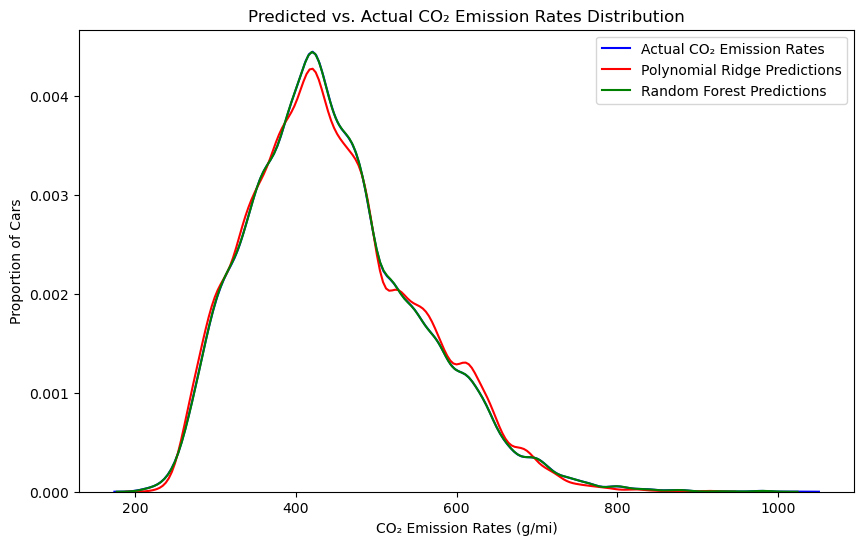

In [354]:
# Predict emissions for the entire dataset using the retrained Random Forest model
predicted_rf = rf_model_rt.predict(X)

# Define plot size
plt.figure(figsize=(10, 6))

# KDE plots for three distributions
ax = sns.kdeplot(actual, color="b", label="Actual CO₂ Emission Rates", bw_adjust=0.8)   # Blue Line - Actual Values
sns.kdeplot(predicted_poly, color="r", label="Polynomial Ridge Predictions", ax=ax, bw_adjust=0.8)  # Red Line - Polynomial Ridge Predictions
sns.kdeplot(predicted_rf, color="g", label="Random Forest Predictions", ax=ax, bw_adjust=0.8)  # Green Line - Random Forest Predictions

# Add title and labels
plt.title("Predicted vs. Actual CO₂ Emission Rates Distribution")
plt.xlabel("CO₂ Emission Rates (g/mi)")
plt.ylabel("Proportion of Cars")

# Add legend
plt.legend()

# Show plot
plt.show()

**Observations:**
- **Polynomial Ridge (Red Line)**  
  - Closely follows the actual distribution but slightly overestimates the peak.  
  - Some deviations in the tail regions, indicating minor errors in extreme emission values.  
- **Random Forest (Green Line)**  
  - Nearly identical to the actual distribution (blue line), demonstrating superior accuracy.  
  - Smoothly follows the entire emission range, capturing both peak and tail behaviors effectively.  

**Random Forest achieves the best fit**, with near-perfect alignment to actual CO₂ emission rates.  

<h4>5.5.7. Prediction Example</h4>

Let's say an auto company announced they will release two new cars in 2026 with the following features:
- `Model year` = (2026, 2026)
- `Engine size (L)` = (2, 2.1)
- `Cylinders` = (4, 4)
- `Transmission type` = ("M", "AV")
- `Number of gears-speeds` = (6, 8)
- `Fuel type` = ("Z", "Z")
- `City (mpg)` = (22, 23)
- `Highway (mpg)` = (32, 33)

The two cars differ in their `Engine size`, `Transmission type`, `Number of gears-speeds`, and fuel consumptions (MPGs). I'm interested to buy the one with the smaller use-phase CO2 emission rates. 
I know that smaller engines and cars with more gears/speed generally tend to emit less, and manual transmission is correlated with higher emission rates. Similarly, I know higher MPGs are associated with lower rates.
However, I don't have a good sense about these new cars and how the differing variables interact with each other. The trained model enables me to get an estimate with a high level of confidence.

I need to take the following steps to prepare the data for the model and get a prediction:

In [359]:
from scipy.stats import norm

# Step 1: Define multiple hypothetical vehicles
hypothetical_vehicles = pd.DataFrame([
    {"Model year": 2026, "Engine size (L)": 2, "Cylinders": 4, "Transmission type": "M", 
     "Number of gears-speeds": 6, "Fuel type": "Z", "City (mpg)": 22, "Highway (mpg)": 32},
    
    {"Model year": 2026, "Engine size (L)": 2.1, "Cylinders": 4, "Transmission type": "AV", 
     "Number of gears-speeds": 8, "Fuel type": "Z", "City (mpg)": 23, "Highway (mpg)": 33}
])

# Step 2: One-Hot Encode Categorical Features
hypothetical_encoded = pd.get_dummies(hypothetical_vehicles, columns=["Transmission type", "Fuel type"])

# Step 3: Ensure feature alignment with training data (Add missing columns)
missing_cols = set(X.columns) - set(hypothetical_encoded.columns)
for col in missing_cols:
    hypothetical_encoded[col] = 0  # Add missing categorical variables with 0

# Step 4: Reorder columns to match training set
hypothetical_encoded = hypothetical_encoded[X.columns]


# Step 5: Compute standard deviation from residuals
sigma = np.std(rf_residuals)  # Standard deviation of residuals

# Step 6: Compute emissions & 95% confidence intervals (assuming normal distribution of residuals- practically but not exactly)
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # 1.96 for 95% confidence

# Predict emissions for hypothetical vehicles
hypothetical_predictions = rf_model_rt.predict(hypothetical_encoded)

# Compute confidence intervals
lower_bounds = hypothetical_predictions - z_score * sigma
upper_bounds = hypothetical_predictions + z_score * sigma

# Step 7: Display Results with Confidence Intervals
for i, (pred, lower, upper) in enumerate(zip(hypothetical_predictions, lower_bounds, upper_bounds), 1):
    print(f"Hypothetical Vehicle {i} - Predicted CO₂ Emission Rates: {pred:.2f} g/mi")
    print(f"   95% Confidence Interval: ({lower:.2f}, {upper:.2f}) g/mi")

Hypothetical Vehicle 1 - Predicted CO₂ Emission Rates: 347.93 g/mi
   95% Confidence Interval: (340.73, 355.13) g/mi
Hypothetical Vehicle 2 - Predicted CO₂ Emission Rates: 331.57 g/mi
   95% Confidence Interval: (324.36, 338.77) g/mi


The second vehicle has lower emission rates despite having a larger engine (2.5L vs. 2.0L), likely due to differences in transmission type and fuel efficiency (MPGs).
Since the predicted values are outside 95% confidence interval of each other, I feel comfortable to take the second car as the one with lower emissions.

<h4>5.5.8. CO2 Prediction App</h4>

For the final step of this project, I will extract the model and a few file to use in an interactive Streamlit app that utilize this model to predict CO2 emission rates. The aim is to develop a light app that operate independently and minimize processing data.

In [363]:
import joblib    
# ------------------- Save Model for Future Use -------------------

joblib.dump(rf_model, "/Users/hasan/CO2/app/SF/random_forest.pkl")
joblib.dump(rf_model, "/Users/hasan/CO2/app/SF/random_forest_compressed.pkl", compress=3)
joblib.dump(list(X.columns), "/Users/hasan/CO2/app/SF/feature_columns.pkl")  # Save column order for later predictions

print("✅ Model and Feature Columns Saved!")

✅ Model and Feature Columns Saved!


In [365]:
# ------------------- Save Models residuals-------------------
rf_residuals.to_csv("/Users/hasan/CO2/app/SF/residuals_rf.csv", index=False)
pd.Series(actual).to_csv("/Users/hasan/CO2/app/SF/actual_rf.csv", index=False)
pd.Series(predicted_rf).to_csv("/Users/hasan/CO2/app/SF/predicted_rf.csv", index=False)
print("files saved successfully!")

files saved successfully!


<h2 style="
    background-color: #064E3B; 
    color: #A7F3D0; 
    padding: 15px; 
    border-radius: 5px;
    font-size: 28px;
    margin-top: 20px;
">
    6. Conclusion
    <a class="anchor" id="conclusion" style="margin: 10;"></a>
</h2>

This project aimed to develop a predictive model for use-phase CO₂ emission rates of internal combustion engine vehicles (ICEVs), using **9 datasets** from Natural Resources Canada. The combined dataset includes **28,384 records** across North America (1995–2025). I began by importing and cleaning the data, addressing missing values, engineering features, and removing outliers—including hybrid vehicles, which could distort emission trends.

**Exploratory Data Analysis (EDA)** revealed key patterns between engine size, fuel type, and MPG ratings, including the expected negative correlation between fuel efficiency and emission rates. I also detected **multicollinearity** among variables like cylinders, engine size, and MPGs, which guided my feature selection and modeling choices.

I then trained three models: **Linear Ridge Regression**, **Polynomial Ridge Regression (degree 2)**, and **Random Forest**. Through **hyperparameter tuning** and **cross-validation**, I evaluated performance using R², RMSE, and MAE. The **Random Forest model outperformed** the others in accuracy and showed more stable residuals. Residual analysis confirmed it effectively captured nonlinearities and extremes. Additionally, **prediction confidence intervals**—derived from the residual distribution—reinforced the model’s reliability.

In conclusion, this study successfully built a robust framework for predicting CO₂ emission rates using machine learning. While the Random Forest model performed well, future improvements could include adding real-world features like vehicle weight or testing deep learning approaches. Further development could also include adding a user input feature for distance traveled (VMT) to enable total CO₂ emission calculations.

<div style="
    background-color: #f5f5f5; 
    padding: 15px; 
    border-radius: 8px; 
    border-left: 5px solid #4A90E2;
    font-family: Arial, sans-serif;
">

✍️ **Author:**  
**Hasan Roshan** – Sustainability Analyst, Ph.D. in Environmental & Natural Resource Sciences  

🔗 **LinkedIn:**  [/hasanroshan](https://linkedin.com/in/hasanroshan)  

🎓 **Acknowledgments:**  
- This project was inspired by an **IBM Data Science Professional Certificate exercise**, where a small subset of the 1995-2004 dataset (~1,000 records) was used to build a multiple linear regression model based on selected numerical variables. This work significantly expanded the dataset, included categorical variables, and refined the model and explored new methods for improved predictive accuracy. 
- Throughout this project, **prompt engineering** with **ChatGPT** was utilized for code development, optimization, image generation, and content structuring.

⚠️ **Disclaimer:**  Predictions may have slight variances based on real-world conditions. This poject is intended for **educational and analytical purposes**.

📅 **Created:** February 1, 2025  
📅 **Last Updated:** May 6, 2025  

</div>

<!-- Back to Top Button -->
<p style="text-align: left;">
    <a href="#top" style="
        background-color: #A7F3D0; 
        color: #064E3B; 
        padding: 8px 12px; 
        border-radius: 5px; 
        text-decoration: none; 
        font-weight: bold;">
        ⬆ Back to Top
    </a>
</p>